In [1]:
#reading an excel file of adult analysis data and producing/saving the following plots

In [2]:
data_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/all_px_output_new/'
save_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/all_px_output_new/fig3_nov_2/'

In [3]:
import utils.datautils as datautils
from tqdm import tqdm
import os
from os import path
import re
import numpy as np
import pandas as pd
import math
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

In [4]:
output_files = datautils.get_file_names(data_path, group_by='_', order=True, nested_files=False, criteria='.csv')

first 5 files
['/home/tli_project/Desktop/Data/T4/neurons/output/New/all_px_output_new/220209_P36_N2_stable1_sA.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/all_px_output_new/220209_P36_N1_stable1_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/all_px_output_new/220127_P36_N1_stable1_sD.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/all_px_output_new/211121_P36.5_N3_stable1_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/all_px_output_new/211121_P36.5_N2_stable1_sA.csv']


In [5]:
axon_pos = pd.read_csv('/home/tli_project/Desktop/Data/T4/neurons/output/New/TLI_axon_analysis.csv')
axon_pos.index = axon_pos.Neuron

In [6]:
# output_files

In [7]:
# output_files = output_files[:-2]

In [8]:
# plotting individual subtypes at specific timepoint
Plot_t = 80
plot_col = 'PCA_elongation'
plt_order = ['A', 'B', 'C', 'D']
timepoints = {'timepoint':np.arange(36,58,0.25)}
collective_results = pd.DataFrame(timepoints)
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    neu_name = neu_name[:6]+neu_name[neu_name.index('_N'):neu_name.index('_N')+3]
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
    temp_df = temp_df.rename(columns={plot_col:neu_name})
    collective_results = pd.merge(collective_results, temp_df, on='timepoint')

x_values = collective_results.loc[Plot_t][1:]
results = axon_pos.join(x_values)
results.rename(columns={80:'elongation'}, inplace=True)
results['Axon_pos'] = 1 - results.Axon/results.LobulaPlate

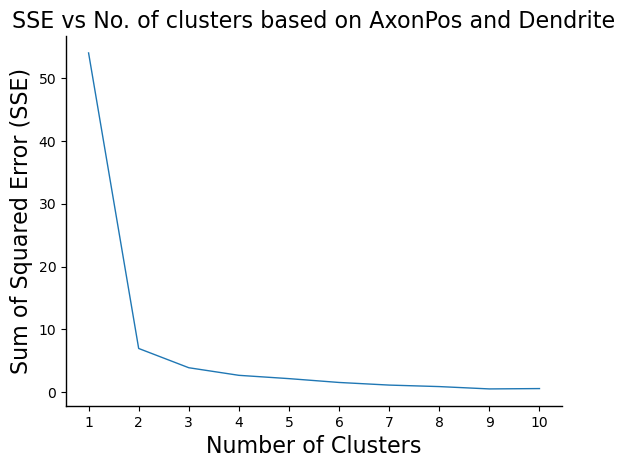

In [10]:
# checking the optimal number of clusters (supplementry figure) and conducting k-means clustering
scaled_df = StandardScaler().fit_transform(results.iloc[:,4:])

#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
fig, ax = plt.subplots(1)
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Error (SSE)")
plt.title("SSE vs No. of clusters based on AxonPos and Dendrite")
# ax.set_aspect('equal', 'box')
plt.style.use('test.mplstyle')

#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=2, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled_df)

#view cluster assignments for each observation
kmeans.labels_

#append cluster assingments to original DataFrame
results['cluster'] = kmeans.labels_
plt.style.use('test.mplstyle')
plt_name = 'SuppFig3_A_SSEforelongation.pdf'
plt.savefig(save_path+plt_name)

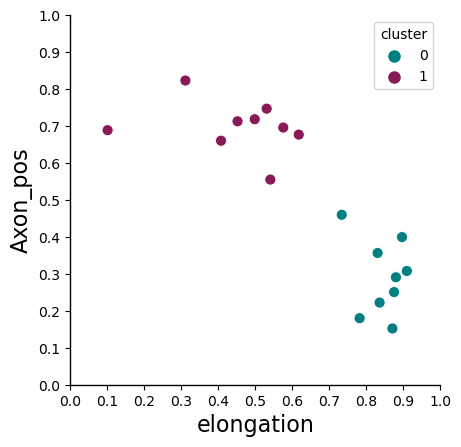

In [11]:
Colors = {'A':'teal','B':'teal','C':'#881a58','D':'#881a58', 0:'teal', 1:'#881a58', 2:'k', 3:'g'}

fig, ax = plt.subplots(1)
sns.scatterplot(data=results,x='elongation', y='Axon_pos', hue='cluster', palette=Colors)
ax.set_yticks(np.arange(0,1.1,0.1))
ax.set_xticks(np.arange(0,1.1,0.1))
ax.set_aspect('equal', 'box')
plt.style.use('test.mplstyle')
plt_name = 'Fig3_A_Axon_elongation_clustering.pdf'
plt.savefig(save_path+plt_name)

/tmp/ipykernel_567849/2878356144.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Horizontal['Mean'] = Horizontal.mean(axis=1)
/tmp/ipykernel_567849/2878356144.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Horizontal['Std'] = Horizontal.std(axis=1)
/tmp/ipykernel_567849/2878356144.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

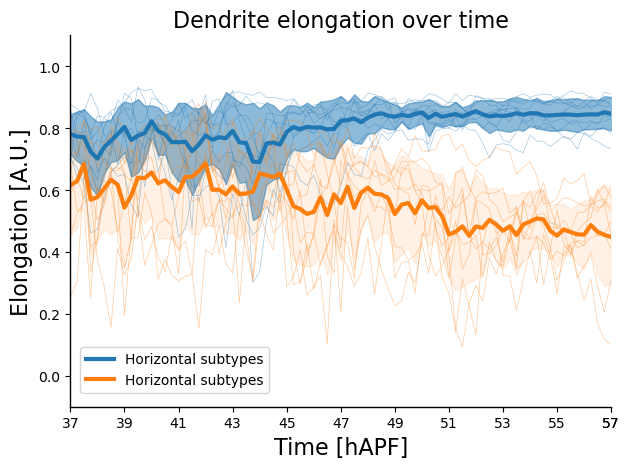

In [50]:
# plotting elongation overtime, seperated by subtype/cluster
timepoints = {'timepoint':np.arange(36,58,0.25)}
collective_results = pd.DataFrame(timepoints)
plot_col = 'PCA_elongation'
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    # neu_name = neu_name[:6]+neu_name[neu_name.index('_N'):neu_name.index('_N')+3]
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
    temp_df = temp_df.rename(columns={plot_col:neu_name})
    collective_results = pd.merge(collective_results, temp_df, on='timepoint')

Horizontal_cols = [col for col in list(collective_results.columns) if (col[-1] == 'A') | (col[-1] == 'B')]
Horizontal = collective_results[Horizontal_cols]

Vertical_cols = [col for col in list(collective_results.columns) if (col[-1] == 'C') | (col[-1] == 'D')]
Vertical = collective_results[Vertical_cols]

fig, ax = plt.subplots(1)

ax.plot(collective_results.timepoint, Horizontal,c=Colors['A'], alpha=0.4, linewidth=0.5)
ax.plot(collective_results.timepoint, Vertical,c=Colors['C'],alpha=0.4, linewidth=0.5)

Horizontal['Mean'] = Horizontal.mean(axis=1)
Horizontal['Std'] = Horizontal.std(axis=1)
ax.plot(collective_results.timepoint, Horizontal.Mean,
        c=Colors['A'], linewidth=3, label='Horizontal subtypes')
ax.fill_between(collective_results.timepoint, 
                y1 = Horizontal.Mean - Horizontal.Std, 
                y2= Horizontal.Mean + Horizontal.Std,
                alpha=0.5,
                color= Colors['A'])

Vertical['Mean'] = Vertical.mean(axis=1)
Vertical['Std'] = Vertical.std(axis=1)
ax.plot(collective_results.timepoint, Vertical.Mean,
        c=Colors['C'], linewidth=3, label='Horizontal subtypes')
ax.fill_between(collective_results.timepoint, 
                y1 = Vertical.Mean - Vertical.Std, 
                y2= Vertical.Mean + Vertical.Std,
                alpha=0.1,
                color= Colors['C'])

ax.set_ylim(-0.1,1.1)
ax.set_xlim(37,57)
x_range1 = list(np.arange(37,58,2))
x_range1.append(57)
ax.set_xticks(x_range1)

ax.set_title('Dendrite elongation over time')
ax.set_xlabel('Time [hAPF]')
ax.set_ylabel('Elongation [A.U.]')

plt.legend(bbox_to_anchor=(.38,0.18))

plt.style.use('test.mplstyle')
plt_name = 'Fig3_B_TLI_elongation_overtime_2.pdf'
plt.savefig(save_path+plt_name, bbox_inches='tight')

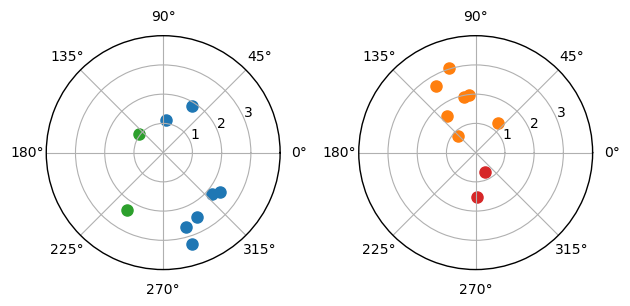

In [143]:
# plotting polar plots of main dendrite angle
Plot_t = 80
plot_col = 'cen_EP_angle'
plt_order = ['A', 'B', 'C', 'D']
results = pd.DataFrame(columns=['angle', 'distance'])
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    neu_name = neu_name[:neu_name.index('_N')+3]+neu_name[-3:]
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col, 'cen_EP_dis'])
    temp_df2 = temp_df.loc[Plot_t][1:]
    results.loc[neu_name] = temp_df2[1], temp_df2[0]

A_sub = results.loc[[s for s in list(results.index) if '_sA' in s]]
B_sub = results.loc[[s for s in list(results.index) if '_sB' in s]]
C_sub = results.loc[[s for s in list(results.index) if '_sC' in s]]
D_sub = results.loc[[s for s in list(results.index) if '_sD' in s]]

Colors = {'A':"tab:blue",'B':"tab:green",'C':"tab:orange",'D':"tab:red"}

# plt.figure(figsize=(16,12))
fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': 'polar'})
# fig, ax = plt.subplots(nrows=1,2,subplot_kw={'projection':'polar'}, sharex=True, sharex=True)
ax[0].scatter(np.deg2rad(A_sub.angle),A_sub.distance,color=Colors['A'])
ax[0].scatter(np.deg2rad(B_sub.angle),B_sub.distance,color=Colors['B'])
ax[0].set_ylim(0,4)
ax[0].set_yticks(range(1,4,1))

ax[1].scatter(np.deg2rad(C_sub.angle+180),C_sub.distance,color=Colors['C'])
ax[1].scatter(np.deg2rad(D_sub.angle+180),D_sub.distance,color=Colors['D'])
ax[1].set_ylim(0,4)
ax[1].set_yticks(range(1,4,1))



In [ ]:
# plotting polar plots of main dendrite angle
Plot_t = 80
plot_col = 'cen_EP_angle'
plt_order = ['A', 'B', 'C', 'D']
results = pd.DataFrame(columns=['angle', 'distance'])
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    neu_name = neu_name[:neu_name.index('_N')+3]+neu_name[-3:]
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', 'centroidY', 'centroidX'])
    temp_df2 = temp_df.loc[Plot_t][1:] - temp_df.loc[0][1:]
    a = np.arctan2(*(temp_df2.centroidY, temp_df2.centroidX))
    b = np.linalg.norm((temp_df2.centroidY, temp_df2.centroidX))
    results.loc[neu_name] = a, b

A_sub = results.loc[[s for s in list(results.index) if '_sA' in s]]
B_sub = results.loc[[s for s in list(results.index) if '_sB' in s]]
C_sub = results.loc[[s for s in list(results.index) if '_sC' in s]]
D_sub = results.loc[[s for s in list(results.index) if '_sD' in s]]

Colors = {'A':"tab:blue",'B':"tab:green",'C':"tab:orange",'D':"tab:red"}

# plt.figure(figsize=(16,12))
fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': 'polar'})
# fig, ax = plt.subplots(nrows=1,2,subplot_kw={'projection':'polar'}, sharex=True, sharex=True)
ax[0].scatter(np.deg2rad(A_sub.angle),A_sub.distance,color=Colors['A'])
ax[0].scatter(np.deg2rad(B_sub.angle),B_sub.distance,color=Colors['B'])
ax[0].set_ylim(0,4)
ax[0].set_yticks(range(1,4,1))

ax[1].scatter(np.deg2rad(C_sub.angle+180),C_sub.distance,color=Colors['C'])
ax[1].scatter(np.deg2rad(D_sub.angle+180),D_sub.distance,color=Colors['D'])
ax[1].set_ylim(0,4)
ax[1].set_yticks(range(1,4,1))

In [92]:
results.loc[('_sB' in results.index[-1])]

TypeError: Cannot index by location index with a non-integer key

In [94]:
[s for s in list(results.index) if '_sB' in s]

['211107_P36_N1_sB', '211011_P37_N1_sB']

In [ ]:
# plotting elongation overtime, seperated by subtype/cluster
timepoints = {'timepoint':np.arange(36,58,0.25)}
collective_results = pd.DataFrame(timepoints)
plot_col = 'PCA_elongation'
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    # neu_name = neu_name[:7]+neu_name[-5:-3]
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
    temp_df = temp_df.rename(columns={plot_col:neu_name})
    collective_results = pd.merge(collective_results, temp_df, on='timepoint')

Horizontal_cols = [col for col in list(collective_results.columns) if (col[-1] == 'A') | (col[-1] == 'B')]
Horizontal = collective_results[Horizontal_cols]

Vertical_cols = [col for col in list(collective_results.columns) if (col[-1] == 'C') | (col[-1] == 'D')]
Vertical = collective_results[Vertical_cols]

fig, ax = plt.subplots(1)

ax.plot(collective_results.timepoint, Horizontal,c=Colors['A'], alpha=0.4, linewidth=0.5)
ax.plot(collective_results.timepoint, Vertical,c=Colors['C'],alpha=0.4, linewidth=0.5)

Horizontal['Mean'] = Horizontal.mean(axis=1)
Horizontal['Std'] = Horizontal.std(axis=1)
ax.plot(collective_results.timepoint, Horizontal.Mean,
        c=Colors['A'], linewidth=3)
ax.fill_between(collective_results.timepoint, 
                y1 = Horizontal.Mean - Horizontal.Std, 
                y2= Horizontal.Mean + Horizontal.Std,
                alpha=0.5,
                color= Colors['A'])

Vertical['Mean'] = Vertical.mean(axis=1)
Vertical['Std'] = Vertical.std(axis=1)
ax.plot(collective_results.timepoint, Vertical.Mean,
        c=Colors['C'], linewidth=3)
ax.fill_between(collective_results.timepoint, 
                y1 = Vertical.Mean - Vertical.Std, 
                y2= Vertical.Mean + Vertical.Std,
                alpha=0.1,
                color= Colors['C'])

ax.set_xlim(37,57)
x_range1 = list(np.arange(37,58,2))
x_range1.append(57)
ax.set_xticks(x_range1)

ax.set_title('Dendrite elongation over time')
ax.set_xlabel('hours after puparium formartion [hAPF]')
ax.set_ylabel('Elongation [A.U.]')

plt.style.use('test.mplstyle')
plt_name = 'Fig3_B_TLI_elongation_overtime.pdf'
# plt.savefig(save_path+plt_name)

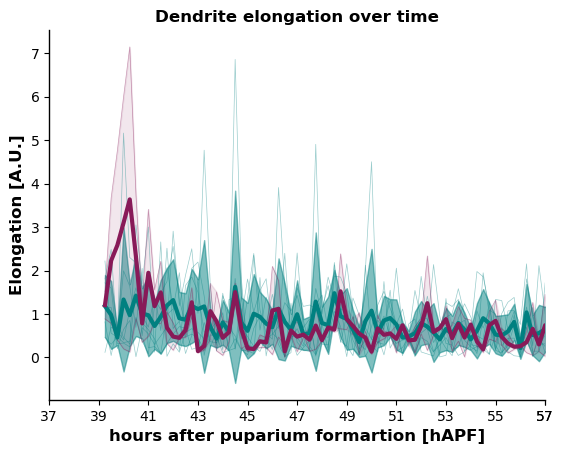

In [205]:
# plotting elongation overtime, seperated by subtype/cluster
timepoints = {'timepoint':np.arange(36,58,0.25)}
collective_results = pd.DataFrame(timepoints)
plot_col = 'centroidY'
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    # neu_name = neu_name[:7]+neu_name[-5:-3]
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
    temp_df = temp_df.rename(columns={plot_col:neu_name})
    collective_results = pd.merge(collective_results, temp_df, on='timepoint')

collective_results1 = pd.DataFrame(timepoints)
plot_col = 'centroidX'
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    # neu_name = neu_name[:7]+neu_name[-5:-3]
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
    temp_df = temp_df.rename(columns={plot_col:neu_name})
    collective_results1 = pd.merge(collective_results1, temp_df, on='timepoint')


Horizontal_cols = [col for col in list(collective_results.columns) if (col[-1] == 'A')]
Horizontal = collective_results[Horizontal_cols].diff()
Horizontal1 = collective_results1[Horizontal_cols].diff()
Horizontal = Horizontal.abs()
# Horizontal = Horizontal.abs() / Horizontal1.abs()

Vertical_cols = [col for col in list(collective_results.columns) if (col[-1] == 'B')]
Vertical = collective_results[Vertical_cols].diff()
Vertical1 = collective_results1[Vertical_cols].diff()
Vertical = Vertical.abs()
# Vertical = Vertical.abs() / Vertical1.abs()


fig, ax = plt.subplots(1)

ax.plot(collective_results.timepoint, Horizontal,c=Colors['A'], alpha=0.4, linewidth=0.5)
ax.plot(collective_results.timepoint, Vertical,c=Colors['C'],alpha=0.4, linewidth=0.5)

Horizontal['Mean'] = Horizontal.mean(axis=1)
Horizontal['Std'] = Horizontal.std(axis=1)
ax.plot(collective_results.timepoint, Horizontal.Mean,
        c=Colors['A'], linewidth=3)
ax.fill_between(collective_results.timepoint, 
                y1 = Horizontal.Mean - Horizontal.Std, 
                y2= Horizontal.Mean + Horizontal.Std,
                alpha=0.5,
                color= Colors['A'])

Vertical['Mean'] = Vertical.mean(axis=1)
Vertical['Std'] = Vertical.std(axis=1)
ax.plot(collective_results.timepoint, Vertical.Mean,
        c=Colors['C'], linewidth=3)
ax.fill_between(collective_results.timepoint, 
                y1 = Vertical.Mean - Vertical.Std, 
                y2= Vertical.Mean + Vertical.Std,
                alpha=0.1,
                color= Colors['C'])

ax.set_xlim(37,57)
x_range1 = list(np.arange(37,58,2))
x_range1.append(57)
ax.set_xticks(x_range1)

ax.set_title('Dendrite elongation over time')
ax.set_xlabel('hours after puparium formartion [hAPF]')
ax.set_ylabel('Elongation [A.U.]')

plt.style.use('test.mplstyle')
plt_name = 'Fig3_B_TLI_elongation_overtime.pdf'
# plt.savefig(save_path+plt_name)

In [191]:
Horizontal.abs()

,220209_P36_N2_sA,211121_P36.5_N2_sA,211121_P36.5_N1_sA,211114_P36_N2_sA,211114_P36_N1_sA,211113_P36_N2_sA,211104_P36_N2_sA,Mean,Std
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13.511134,6.118460,1.935589,4.130929,0.609638,1.528160,3.772345,4.340997,4.239695
2,19.406580,6.741777,3.645112,4.350865,7.760604,4.289340,4.359402,0.791413,8.844120
3,2.488554,0.698996,1.036230,7.499033,0.636236,0.991019,10.942629,0.548877,5.113148
4,1.245274,0.064606,9.253410,2.130674,4.091744,2.202919,9.726408,0.967381,5.363470
...,...,...,...,...,...,...,...,...,...
77,1.288392,1.348854,0.142018,1.994339,0.948650,0.575766,2.212212,0.157723,1.385027
78,2.399240,4.833127,0.321449,0.106669,2.859036,1.077154,0.446672,1.562381,1.759741
79,1.265375,1.280046,0.578777,0.689840,3.330186,1.503939,0.659056,0.180512,1.586046
80,0.974620,0.130867,0.349918,0.199599,1.146841,0.868764,0.739075,0.187341,0.707091


In [192]:
Horizontal1.abs()

,220209_P36_N2_sA,211121_P36.5_N2_sA,211121_P36.5_N1_sA,211114_P36_N2_sA,211114_P36_N1_sA,211113_P36_N2_sA,211104_P36_N2_sA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.656014,3.765471,3.320412,2.105750,0.320806,1.052244,3.451821
2,2.700991,3.846838,1.487433,0.522687,2.748594,0.781560,1.096423
3,4.909087,0.443288,2.017426,0.959774,0.687482,0.541131,0.631063
4,1.878287,1.367392,1.391642,3.398620,2.228590,0.905600,2.690574
...,...,...,...,...,...,...,...
77,1.368887,0.285344,0.620096,0.610123,1.119521,0.381912,1.035313
78,1.251127,0.458341,0.163476,0.010895,0.567919,0.320570,0.419640
79,0.167547,0.002406,1.169042,2.288769,1.301749,0.108239,0.793892
80,0.295199,1.611718,1.111520,0.604738,0.430092,0.525844,1.355292


/tmp/ipykernel_531034/3461466567.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Horizontal['Mean'] = Horizontal.mean(axis=1)
/tmp/ipykernel_531034/3461466567.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Horizontal['Std'] = Horizontal.std(axis=1)
/tmp/ipykernel_531034/3461466567.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

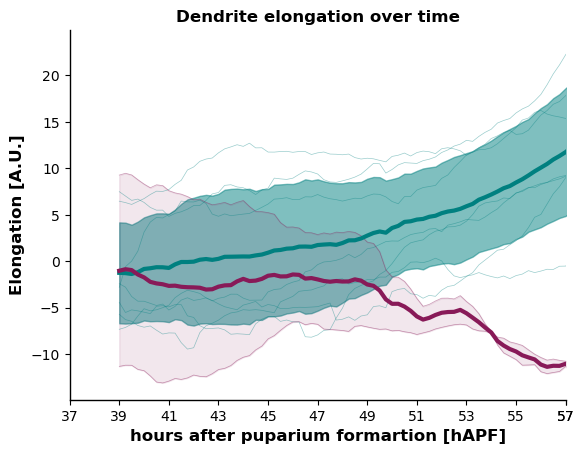

In [149]:
# plotting elongation overtime, seperated by subtype/cluster
timepoints = {'timepoint':np.arange(36,58,0.25)}
collective_results = pd.DataFrame(timepoints)
plot_col = 'cen_EP_x'
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    # neu_name = neu_name[:7]+neu_name[-5:-3]
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
    temp_df = temp_df.rename(columns={plot_col:neu_name})
    collective_results = pd.merge(collective_results, temp_df, on='timepoint')

Horizontal_cols = [col for col in list(collective_results.columns) if (col[-1] == 'A')]
Horizontal = collective_results[Horizontal_cols]

Vertical_cols = [col for col in list(collective_results.columns) if (col[-1] == 'B')]
Vertical = collective_results[Vertical_cols]

fig, ax = plt.subplots(1)

ax.plot(collective_results.timepoint, Horizontal,c=Colors['A'], alpha=0.4, linewidth=0.5)
ax.plot(collective_results.timepoint, Vertical,c=Colors['C'],alpha=0.4, linewidth=0.5)

Horizontal['Mean'] = Horizontal.mean(axis=1)
Horizontal['Std'] = Horizontal.std(axis=1)
ax.plot(collective_results.timepoint, Horizontal.Mean,
        c=Colors['A'], linewidth=3)
ax.fill_between(collective_results.timepoint, 
                y1 = Horizontal.Mean - Horizontal.Std, 
                y2= Horizontal.Mean + Horizontal.Std,
                alpha=0.5,
                color= Colors['A'])

Vertical['Mean'] = Vertical.mean(axis=1)
Vertical['Std'] = Vertical.std(axis=1)
ax.plot(collective_results.timepoint, Vertical.Mean,
        c=Colors['C'], linewidth=3)
ax.fill_between(collective_results.timepoint, 
                y1 = Vertical.Mean - Vertical.Std, 
                y2= Vertical.Mean + Vertical.Std,
                alpha=0.1,
                color= Colors['C'])

ax.set_xlim(37,57)
x_range1 = list(np.arange(37,58,2))
x_range1.append(57)
ax.set_xticks(x_range1)

ax.set_title('Dendrite elongation over time')
ax.set_xlabel('hours after puparium formartion [hAPF]')
ax.set_ylabel('Elongation [A.U.]')

plt.style.use('test.mplstyle')
plt_name = 'Fig3_B_TLI_elongation_overtime.pdf'
# plt.savefig(save_path+plt_name)

/tmp/ipykernel_531034/2582850333.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Horizontal['Mean'] = Horizontal.mean(axis=1)
/tmp/ipykernel_531034/2582850333.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Horizontal['Std'] = Horizontal.std(axis=1)
/tmp/ipykernel_531034/2582850333.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

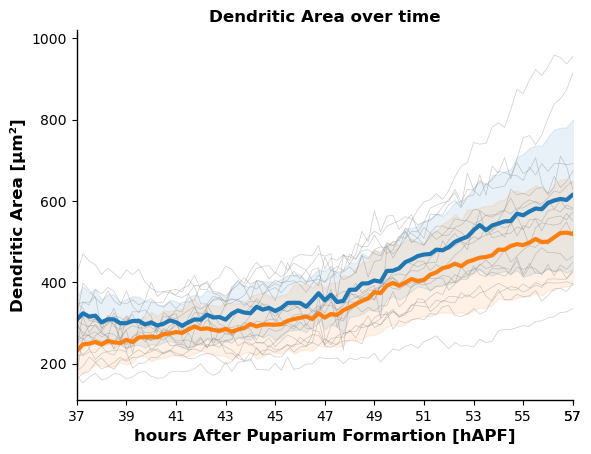

In [68]:
# plotting elongation overtime, seperated by subtype/cluster
timepoints = {'timepoint':np.arange(36,58,0.25)}
collective_results = pd.DataFrame(timepoints)
plot_col = 'volume'
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    # neu_name = neu_name[:7]+neu_name[-5:-3]
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
    temp_df = temp_df.rename(columns={plot_col:neu_name})
    collective_results = pd.merge(collective_results, temp_df, on='timepoint')

Horizontal_cols = [col for col in list(collective_results.columns) if (col[-1] == 'A') | (col[-1] == 'B')]
Horizontal = collective_results[Horizontal_cols]
# Horizontal = Horizontal/Horizontal.iloc[0]

Vertical_cols = [col for col in list(collective_results.columns) if (col[-1] == 'C') | (col[-1] == 'D')]
Vertical = collective_results[Vertical_cols]
# Vertical = Vertical/Vertical.iloc[0]

fig, ax = plt.subplots(1)

ax.plot(collective_results.timepoint, Horizontal,c='grey', alpha=0.4, linewidth=0.5)
ax.plot(collective_results.timepoint, Vertical,c='grey',alpha=0.4, linewidth=0.5)

Horizontal['Mean'] = Horizontal.mean(axis=1)
Horizontal['Std'] = Horizontal.std(axis=1)
ax.plot(collective_results.timepoint, Horizontal.Mean,
        c=Colors['A'], linewidth=3)
ax.fill_between(collective_results.timepoint, 
                y1 = Horizontal.Mean - Horizontal.Std, 
                y2= Horizontal.Mean + Horizontal.Std,
                alpha=0.1,
                color= Colors['A'])

Vertical['Mean'] = Vertical.mean(axis=1)
Vertical['Std'] = Vertical.std(axis=1)
ax.plot(collective_results.timepoint, Vertical.Mean,
        c=Colors['C'], linewidth=3)
ax.fill_between(collective_results.timepoint, 
                y1 = Vertical.Mean - Vertical.Std, 
                y2= Vertical.Mean + Vertical.Std,
                alpha=0.1,
                color= Colors['C'])

ax.set_xlim(37,57)
x_range1 = list(np.arange(37,58,2))
x_range1.append(57)
ax.set_xticks(x_range1)

ax.set_title('Dendritic Area over time')
ax.set_xlabel('hours After Puparium Formartion [hAPF]')
# ax.set_ylabel("Dendritic Area [$µm^{2}$]")
ax.set_ylabel("Dendritic Area [µm²]")

plt.style.use('test.mplstyle')
plt_name = 'Fig3_N_Convex_area_subtypes.pdf'
# plt.savefig(save_path+plt_name)

In [69]:
collective_results.to_csv(save_path+'TLI_volume.csv')

first 5 files
['/home/tli_project/Desktop/Data/T4/neurons/output/New/all_px/220209_P36_N2_sA.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/all_px/220209_P36_N1_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/all_px/220127_P36_N1_sD.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/all_px/211121_P36.5_N3_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/all_px/211121_P36.5_N2_sA.csv']


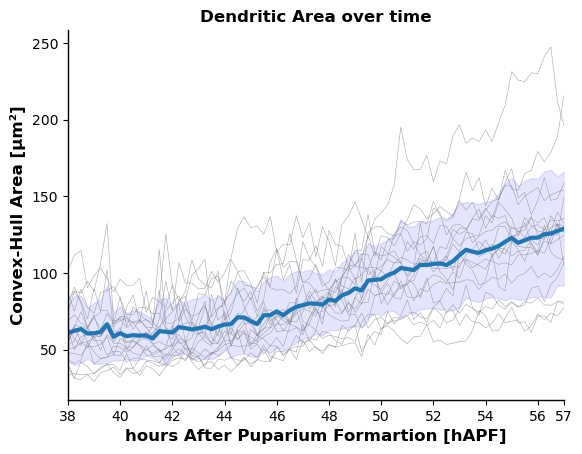

In [46]:
fig2_C = 'area'

output_files = datautils.get_file_names(data_path, group_by='_', order=True, nested_files=False, criteria='.csv')

timepoints = {'timepoint':np.arange(36,58,0.25)}
results = pd.DataFrame(timepoints)
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', fig2_C])
    temp_df = temp_df.rename(columns={fig2_C:neu_name})
    results = pd.merge(results, temp_df, on='timepoint')

fig, ax = plt.subplots(1)

#plotting individual neuron traces as grey faint lines
plt.plot(results.timepoint, results.loc[:,results.columns != 'timepoint'], c='grey', alpha=0.7, linewidth=0.4)

# calculating mean and std and plotting them
results_mean = results.loc[:,results.columns != 'timepoint'].mean(axis=1)
results_std = results.loc[:,results.columns != 'timepoint'].std(axis=1)
results['mean'] = results_mean
results['std'] = results_std

plt.plot(results.timepoint, results_mean, linewidth=3)
min_val = results_mean - 1*results_std
max_val = results_mean + 1*results_std
plt.fill_between(results['timepoint'], min_val, max_val, color='blue', alpha=.1)

plt.xlim(38,57)
x_range1 = list(np.arange(38,58,2))
x_range1.append(57)
plt.xticks(x_range1)


ax.set_title('Dendritic Area over time')
ax.set_xlabel('hours After Puparium Formartion [hAPF]')
# ax.set_ylabel("Dendritic Area [$µm^{2}$]")
ax.set_ylabel("Convex-Hull Area [µm²]")

plt.style.use('test.mplstyle')
plt_name = 'Fig2_E_Convex_area.pdf'
plt.savefig(save_path+plt_name)

In [99]:
# plotting individual subtypes at specific timepoint
Plot_t = 80
plot_col = 'PCA_elongation'
plt_order = ['A', 'B', 'C', 'D']
timepoints = {'timepoint':np.arange(36,58,0.25)}
collective_results = pd.DataFrame(timepoints)
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    neu_name = neu_name[:7]+neu_name[-5:-3]
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
    temp_df = temp_df.rename(columns={plot_col:neu_name})
    collective_results = pd.merge(collective_results, temp_df, on='timepoint')

x_values = collective_results.loc[Plot_t][1:]
results = axon_pos.join(x_values)
results.rename(columns={80:'elongation'}, inplace=True)

collective_results = pd.DataFrame(timepoints)
plot_col = 'cen_EP_angle'
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    neu_name = neu_name[:7]+neu_name[-5:-3]
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
    temp_df = temp_df.rename(columns={plot_col:neu_name})
    collective_results = pd.merge(collective_results, temp_df, on='timepoint')

x_values = collective_results.loc[Plot_t][1:]
results = results.join(x_values)
results.rename(columns={80:'angle'}, inplace=True)

results['Axon_pos'] = 1 - results.Axon/results.LobulaPlate

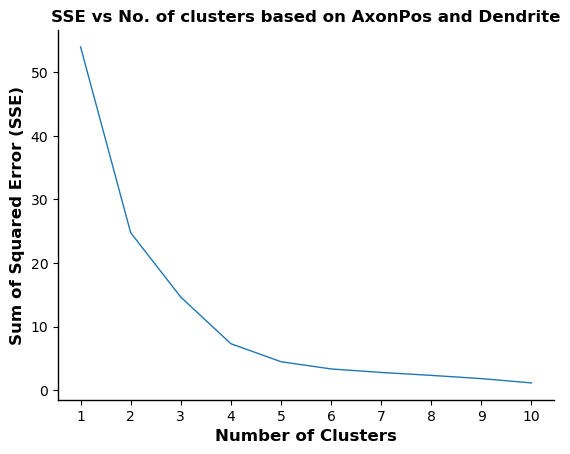

In [100]:
# checking the optimal number of clusters (supplementry figure) and conducting k-means clustering
scaled_df = StandardScaler().fit_transform(results.iloc[:,4:])

#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
fig, ax = plt.subplots(1)
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Error (SSE)")
plt.title("SSE vs No. of clusters based on AxonPos and Dendrite")
# ax.set_aspect('equal', 'box')
plt.style.use('test.mplstyle')

#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=4, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled_df)

#view cluster assignments for each observation
kmeans.labels_

#append cluster assingments to original DataFrame
results['cluster'] = kmeans.labels_
plt_name = 'SuppFig3_A_SSEforelongation.pdf'
plt.savefig(save_path+plt_name)

In [101]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

#Load Data
# data = load_digits().data
data = results.iloc[:,4:7]
pca = PCA(2)
#Transform the data
df = pca.fit_transform(data)
df.shape


(18, 2)

In [105]:
results['angle2'] = np.deg2rad(results.angle)+2*np.pi

In [106]:
results

,Neuron,Axon,LobulaPlate,Subtype,elongation,angle,Axon_pos,cluster,angle2
Neuron,,,,,,,,,
211011_N1,211011_N1,4.852,8.983,B,0.734122,238.151037,0.459869,1,10.439705
211104_N1,211104_N1,4.482,10.074,C,0.541007,281.402409,0.555092,2,11.194584
211104_N2,211104_N2,4.236,7.055,A,0.897083,319.600917,0.399575,1,11.861274
211104_N3,211104_N3,3.834,13.342,C,0.452145,307.768187,0.712637,2,11.654754
211107_N1,211107_N1,10.357,12.216,B,0.871190,142.235895,0.152177,3,8.765670
211107_N2,211107_N2,3.926,12.610,C,0.100647,232.988776,0.688660,0,10.349607
211107_N3,211107_N3,3.765,14.881,D,0.530988,114.580323,0.746993,0,8.282989
211113_N1,211113_N1,4.985,14.670,C,0.407540,301.223834,0.660191,2,11.540533
211113_N2,211113_N2,13.303,17.753,A,0.875797,298.077197,0.250662,1,11.485614


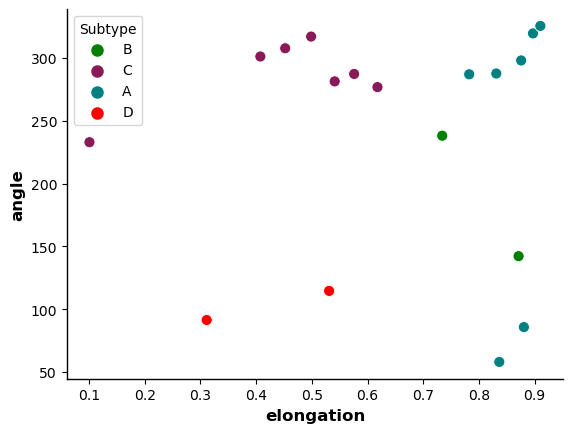

In [108]:
Colors = {'A':'teal','B':'green','C':'#881a58','D':'red', 0:'teal', 1:'#881a58', 2:'k', 3:'g'}

fig, ax = plt.subplots(1)
sns.scatterplot(data=results,x='elongation', y='angle', hue='Subtype', palette=Colors)
# ax.set_yticks(np.arange(0,1.1,0.1))
# ax.set_xticks(np.arange(0,1.1,0.1))
# ax.set_aspect('equal', 'box')
plt.style.use('test.mplstyle')
plt_name = 'Fig3_A_Axon_elongation_clustering.pdf'
plt.savefig(save_path+plt_name)

In [109]:
results

,Neuron,Axon,LobulaPlate,Subtype,elongation,angle,Axon_pos,cluster,angle2
Neuron,,,,,,,,,
211011_N1,211011_N1,4.852,8.983,B,0.734122,238.151037,0.459869,1,10.439705
211104_N1,211104_N1,4.482,10.074,C,0.541007,281.402409,0.555092,2,11.194584
211104_N2,211104_N2,4.236,7.055,A,0.897083,319.600917,0.399575,1,11.861274
211104_N3,211104_N3,3.834,13.342,C,0.452145,307.768187,0.712637,2,11.654754
211107_N1,211107_N1,10.357,12.216,B,0.871190,142.235895,0.152177,3,8.765670
211107_N2,211107_N2,3.926,12.610,C,0.100647,232.988776,0.688660,0,10.349607
211107_N3,211107_N3,3.765,14.881,D,0.530988,114.580323,0.746993,0,8.282989
211113_N1,211113_N1,4.985,14.670,C,0.407540,301.223834,0.660191,2,11.540533
211113_N2,211113_N2,13.303,17.753,A,0.875797,298.077197,0.250662,1,11.485614


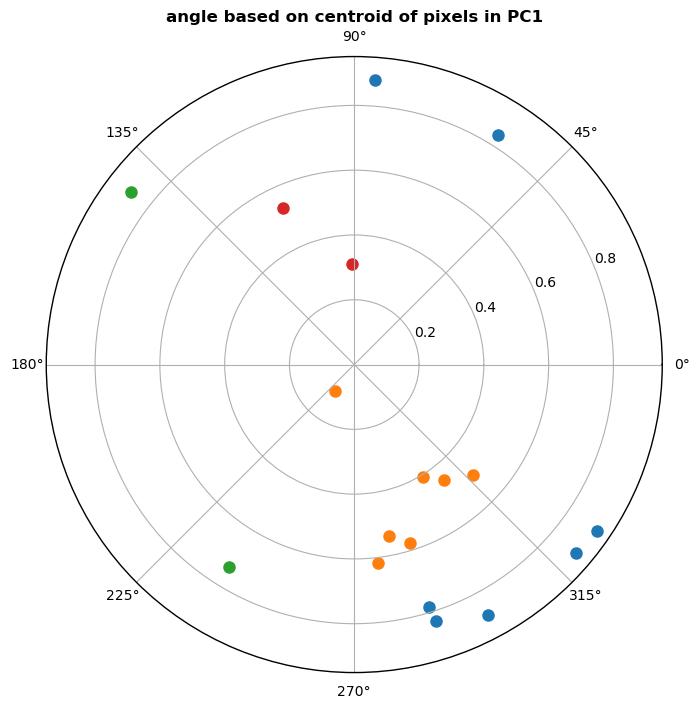

In [73]:
Colors = {'A':"tab:blue",'B':"tab:green",'C':"tab:orange",'D':"tab:red"}

plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection = 'polar')

for i, neu in results.iterrows():
    # y, x = neu.PC1_cen_y, neu.PC1_cen_x
    # y, x = float(y[2:-2]), float(x[2:-2])
    # # print(type(y), y, x)
    # rad = np.arctan2(y,x)
    rad = math.radians(neu.angle)
    # rad = neu.PC1_angle
    # dist = np.linalg.norm((y,x))*0.076
    dist = neu.elongation
    c = Colors[neu.Subtype]
    # print(neu.subtype, y, x, rad)
    ax.scatter(rad,dist, color=c)
ax.grid(True)
plt.title('angle based on centroid of pixels in PC1')

plot_name = 'cen_EP_PCA_angle'+'_in_adult_T4_dendrites.pdf'
# plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

In [40]:
results

,Neuron,Axon,LobulaPlate,Subtype,elongation,PC1_angle,Axon_pos,cluster
Neuron,,,,,,,,
211011_N1,211011_N1,4.852,8.983,B,0.734122,202.115560,0.459869,3
211104_N1,211104_N1,4.482,10.074,C,0.541007,274.762128,0.555092,1
211104_N2,211104_N2,4.236,7.055,A,0.897083,350.680595,0.399575,3
211104_N3,211104_N3,3.834,13.342,C,0.452145,347.250865,0.712637,1
211107_N1,211107_N1,10.357,12.216,B,0.871190,183.700056,0.152177,2
211107_N2,211107_N2,3.926,12.610,C,0.100647,208.114184,0.688660,0
211107_N3,211107_N3,3.765,14.881,D,0.530988,168.543965,0.746993,0
211113_N1,211113_N1,4.985,14.670,C,0.407540,306.348094,0.660191,1
211113_N2,211113_N2,13.303,17.753,A,0.875797,348.542383,0.250662,3


In [100]:
Horizontal.iloc[0]

220209_P36_N2_sA      0.691374
211121_P36.5_N2_sA    0.701217
211121_P36.5_N1_sA    0.784012
211114_P36_N2_sA      0.862758
211114_P36_N1_sA      0.786432
211113_P36_N2_sA      0.778929
211107_P36_N1_sB      0.831173
211104_P36_N2_sA      0.876385
211011_P37_N1_sB      0.713193
Mean                  0.780608
Std                   0.064410
Name: 0, dtype: float64

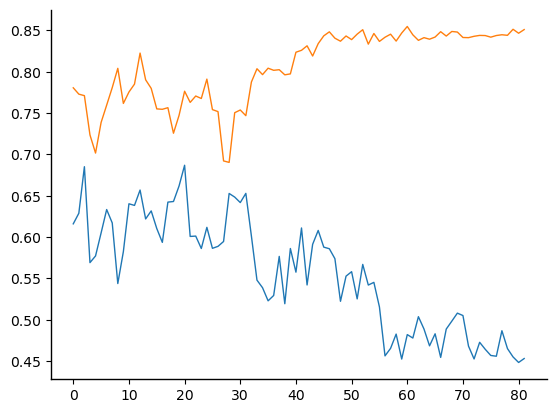

In [65]:
plt.figure(figsize=(8, 6), dpi=80)
colors = {'A':'teal','B':'teal' , 'C':'#881a58', 'D':'#881a58', 'C/D':'#881a58'}

plt.plot(subset['timepoints'], subset['mean_'+plot_col], label='Horizontal subtypes',
        c=colors['A'], linestyle='solid', linewidth=3)

min_val = subset['mean_'+plot_col] - 1*subset['std_'+plot_col]
max_val = subset['mean_'+plot_col] + 1*subset['std_'+plot_col]
plt.fill_between(subset['timepoints'], min_val, max_val, color=colors['A'], alpha=.1)

plt.plot(subset1_1['timepoints'], subset1_1['mean_'+plot_col], label='Vertical subtypes',
        c=colors['D'], linestyle='solid', linewidth=3)

min_val = subset1_1['mean_'+plot_col] - 1*subset1_1['std_'+plot_col]
max_val = subset1_1['mean_'+plot_col] + 1*subset1_1['std_'+plot_col]
plt.fill_between(subset1_1['timepoints'], min_val, max_val, color=colors['D'], alpha=.1)

plt.legend(bbox_to_anchor=(.65, 0.9), loc=2, borderaxespad=0., prop={'size': 12})
plt.title('percentage of transient to stable pixels', fontsize=22)
plt.ylabel('transient pixels #/stable pixels # [A.U.]', fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
# plt.ylim(0.5,1)
plt.xlim(38,57)
x_range1 = list(np.arange(38,58,2))
x_range1.append(57)
sns.despine()
plt.xticks(x_range1)
plt.xlabel("Hours After Puparium Formation [h]", fontsize=16)
fig_name = save_path+plot_col+'_um_July.pdf'
plt.savefig(fig_name, bbox_inches='tight')

In [48]:
[col for col in list(collective_results.columns) if (col[-1] == 'A') | (col[-1] == 'B')]

['220209_P36_N2_sA',
 '211121_P36.5_N2_sA',
 '211121_P36.5_N1_sA',
 '211114_P36_N2_sA',
 '211114_P36_N1_sA',
 '211113_P36_N2_sA',
 '211107_P36_N1_sB',
 '211104_P36_N2_sA',
 '211011_P37_N1_sB']

In [41]:
neu_types = {}
for neu in output_files:
    name = path.splitext(path.basename(neu))[0]
    neu_types[name] = name.split('_s')[1]
neu_types = {'neu_type':list(neu_types.values()),'neu_name':list(neu_types.keys())}
neu_types = pd.DataFrame(neu_types) 

Hori_subset = neu_types[(neu_types.neu_type == 'A') | (neu_types.neu_type == 'B')]
Hori_subset = results[Hori_subset.neu_name]
Hori_subset['mean_'] = Hori_subset.mean(axis = 1)
Hori_subset['std_'] = Hori_subset.std(axis = 1)

KeyError: "None of [Index(['220209_P36_N2_sA', '211121_P36.5_N2_sA', '211121_P36.5_N1_sA',\n       '211114_P36_N2_sA', '211114_P36_N1_sA', '211113_P36_N2_sA',\n       '211107_P36_N1_sB', '211104_P36_N2_sA', '211011_P37_N1_sB'],\n      dtype='object')] are in the [columns]"

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaled_df = StandardScaler().fit_transform(results.iloc[:,4:])

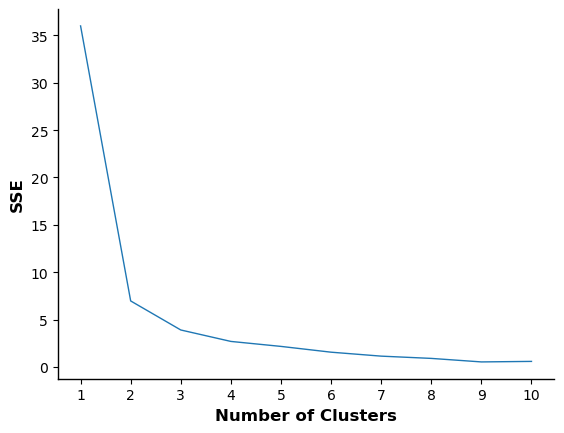

In [25]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [28]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=2, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled_df)

#view cluster assignments for each observation
kmeans.labels_

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int32)

In [31]:
#append cluster assingments to original DataFrame
results['cluster'] = kmeans.labels_
results.head()

,Neuron,Axon,LobulaPlate,Subtype,elongation,Axon_pos,cluster
Neuron,,,,,,,
211011_N1,211011_N1,4.852,8.983,B,0.734122,0.459869,0
211104_N1,211104_N1,4.482,10.074,C,0.541007,0.555092,1
211104_N2,211104_N2,4.236,7.055,A,0.897083,0.399575,0
211104_N3,211104_N3,3.834,13.342,C,0.452145,0.712637,1
211107_N1,211107_N1,10.357,12.216,B,0.871190,0.152177,0


In [14]:
plt.rcParams['font.family'] = 'z003'
plt.rcParams['font.z003'] = ['Tahoma']

KeyError: 'font.z003 is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

In [16]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.gri

In [83]:
import matplotlib.font_manager as fm
names = []
for f in fm.fontManager.ttflist:
   names.append(f.name)
# for f in fm.fontManager.afmlist:
#    print(f.name)

In [85]:
len(names)

508

In [89]:
names[0:10]

['STIXSizeFourSym',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'STIXSizeOneSym',
 'cmss10',
 'STIXGeneral',
 'DejaVu Sans',
 'STIXSizeFourSym']

In [19]:
data_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/all_px/'
save_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/fig3_nov/'
viloin_plots_to_do = ['volume','density_3D', 'area', 'convexity_3D',
                        'circularity','AP_spread','DV_spread',
                        'surface_area','asymmetry']
line_plots_to_do = ['PCA_xy','PCA_shift_centroid']
plot_cols = ['volume', 'net_area', 'area', 'convexity_3D',
                'AP_spread', 'DV_spread', '3D_convex_surface',
                'density_2D', 'density_3D', 'object_perimeter', 'convex_perimeter', 
                'circularity', 'compactness', 'surface_area', '3D_convex_volume',
                'eccentricity', 'convexity_2D', 'convexity_3D', 'orientation',
                'feret_diameter_max',
                'DGI', 'cen_EP_dis']
time_plots = ['volume', 'net_area', 'area', 'convexity_3D',
                'AP_spread', 'DV_spread', '3D_convex_surface', 'PC1_angle',
                'density_2D', 'density_3D', 'object_perimeter', 'convex_perimeter', 
                'circularity', 'compactness', 'surface_area', '3D_convex_volume',
                'eccentricity', 'convexity_2D', 'convexity_3D', 'orientation',
                'feret_diameter_max',
                'DGI', 'cen_EP_dis', 'cen_EP_angle',
                'asymmetry', 'x_asymmetry', 'y_asymmetry', 'PC1_asymmetry', 'PC2_asymmetry']
norm_T_plots = ['feret_diameter_max', 'DV_spread', 'eccentricity', 'density_3D', 'compactness']
plot_2D_cols = [('cen_EP_X','cen_EP_Y'), ('PC1_x','PC1_y')]
# viloin_plots_to_do = ['eccentricity', 'elipse_elongation', 'ellipticity','PCA_elongation2']
# time_plots = ['avg_trans_dist', 'max_trans_dist']
# plot_cols = ['eccentricity', 'elipse_elongation', 'ellipticity','PCA_elongation2']

plot_cols = ['volume','3D_convex_volume', 'net_area', 'area',
                'AP_spread', 'DV_spread', 'eccentricity', 'ellipticity','PCA_elongation', 
                'density_2D', 'density_3D', 'object_perimeter', 'convex_perimeter', 
                'compactness', 'surface_area', '3D_convex_surface',
                'convexity_2D', 'convexity_3D', 'orientation',
                'feret_diameter_max',
                'centroidZ','centroidY', 'centroidX', 
                'cen_EP_dis', 'cen_EP_angle', 'cen_EP_y', 'cen_EP_x',
                'asymmetry', 'x_asymmetry', 'y_asymmetry', 'PC1_asymmetry', 'PC2_asymmetry',
                'xP_weight','xP_scale','xP_angle',
                'xN_weight','xN_scale','xN_angle',
                'yP_weight','yP_scale','yP_angle',
                'yN_weight','yN_scale','yN_angle',
                'PC1_angle','PC1_x','PC1_y', 'DGI',
                'avg_trans_dist', 'max_trans_dist']

time_plots = ['volume','3D_convex_volume', 'net_area', 'area',
                'AP_spread', 'DV_spread', 'eccentricity', 'ellipticity','PCA_elongation', 
                'density_2D', 'density_3D', 'object_perimeter', 'convex_perimeter', 
                'compactness', 'surface_area', '3D_convex_surface',
                'convexity_2D', 'convexity_3D', 'orientation',
                'feret_diameter_max',
                'centroidZ','centroidY', 'centroidX', 
                'cen_EP_dis', 'cen_EP_angle', 'cen_EP_y', 'cen_EP_x',
                'asymmetry', 'x_asymmetry', 'y_asymmetry', 'PC1_asymmetry', 'PC2_asymmetry',
                'xP_weight','xP_scale','xP_angle',
                'xN_weight','xN_scale','xN_angle',
                'yP_weight','yP_scale','yP_angle',
                'yN_weight','yN_scale','yN_angle',
                'PC1_angle','PC1_x','PC1_y', 'DGI',
                'avg_trans_dist', 'max_trans_dist']

time_plots = [ 'convexity_2D']

In [20]:
# plotting settings
Colors = {'A':'b','B':'g','C':'orange','D':'r'}
x_p = {'A':0,'B':1,'C':2,'D':3}

In [21]:
import utils.datautils as datautils
from tqdm import tqdm
import os
from os import path
import re
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

In [28]:
output_files = datautils.get_file_names(data_path, group_by='_', order=True, nested_files=False, criteria='.csv')

first 5 files
['/home/tli_project/Desktop/Data/T4/neurons/output/New/all_px/220209_P36_N2_sA.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/all_px/220209_P36_N1_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/all_px/220127_P36_N1_sD.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/all_px/211121_P36.5_N3_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/all_px/211121_P36.5_N2_sA.csv']


In [44]:
axon_pos = pd.read_csv('/home/tli_project/Desktop/Data/T4/neurons/output/New/TLI_axon_analysis.csv')

In [104]:
# plotting individual subtypes at specific timepoint
Plot_t = 80
plot_col = 'PCA_elongation'
plt_order = ['A', 'B', 'C', 'D']
timepoints = {'timepoint':np.arange(36,58,0.25)}
collective_results = pd.DataFrame(timepoints)
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('.csv')])
    neu_name = neu_name[:7]+neu_name[-5:-3]
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
    temp_df = temp_df.rename(columns={plot_col:neu_name})
    collective_results = pd.merge(collective_results, temp_df, on='timepoint')

x_values = collective_results.loc[Plot_t][1:]
results = axon_pos.join(x_values)
results.rename(columns={80:'elongation'}, inplace=True)
# results = axon_pos.copy()
results['Axon_pos'] = 1 - results.Axon/results.LobulaPlate

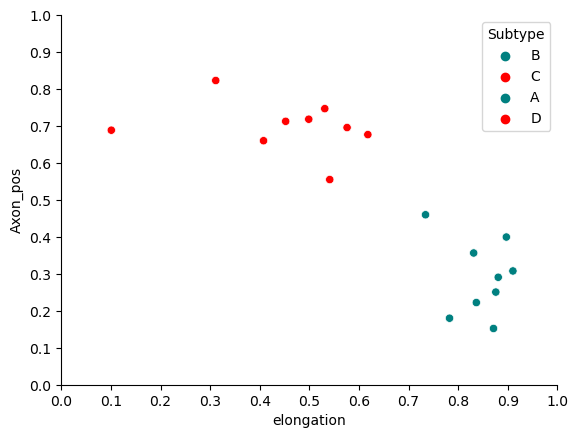

In [121]:
Colors = {'A':'teal','B':'teal','C':'r','D':'r'}

fig, ax = plt.subplots(1)
sns.scatterplot(data=results,x='elongation', y='Axon_pos', hue='Subtype', palette=Colors)
sns.despine()
ax.set_ylim(0,1)
ax.set_xlim(0,1)
ax.set_yticks(np.arange(0,1.1,0.1))
ax.set_xticks(np.arange(0,1.1,0.1))
# seaborn.scatterplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, palette=None

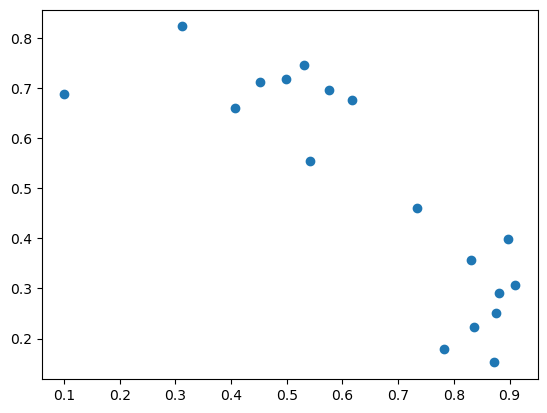

In [106]:
plt.scatter(results.elongation,results.Axon_pos)

/tmp/ipykernel_4124/4260317149.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1)


ValueError: Axis limits cannot be NaN or Inf

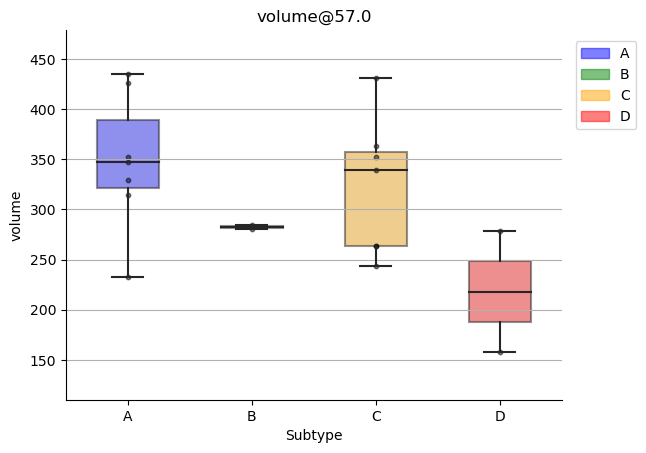

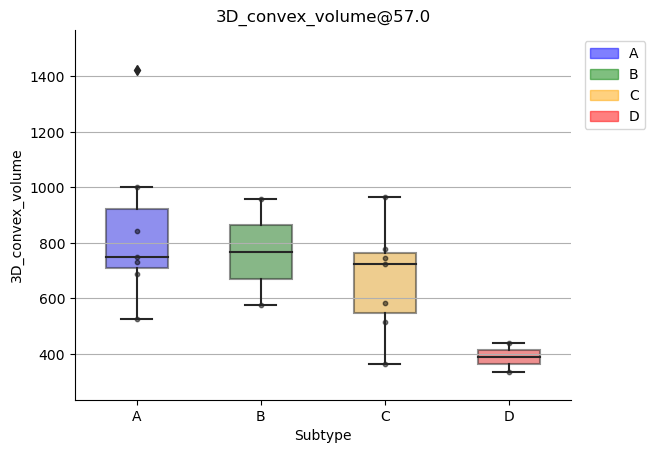

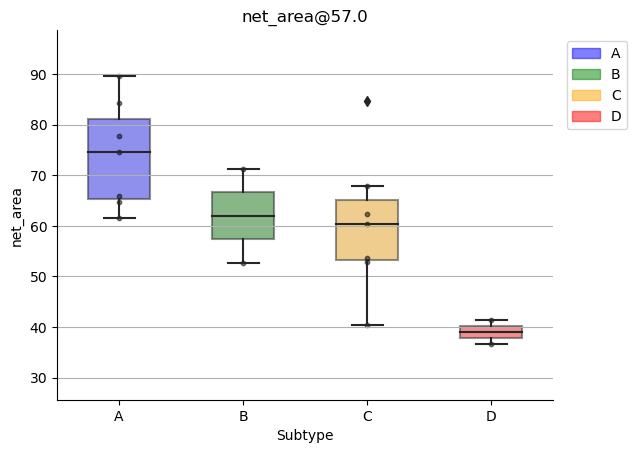

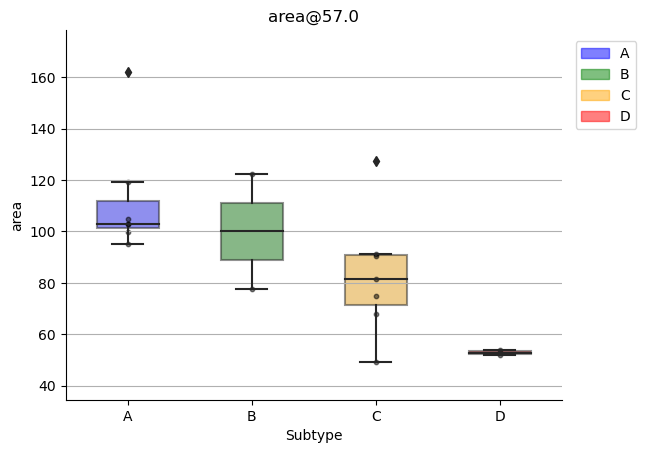

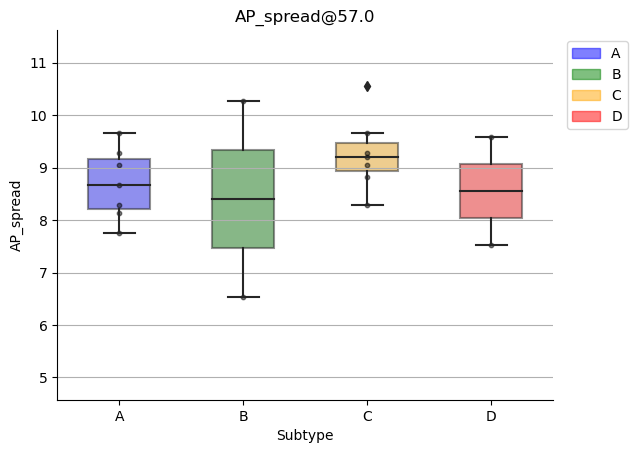

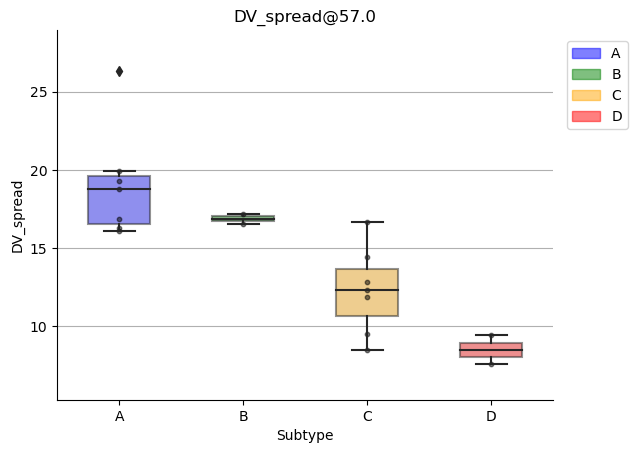

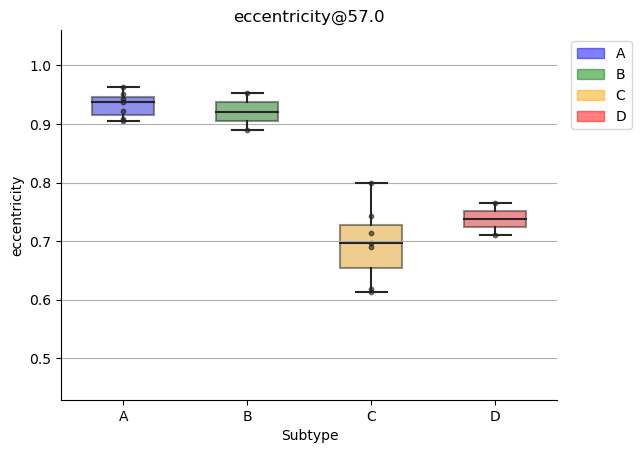

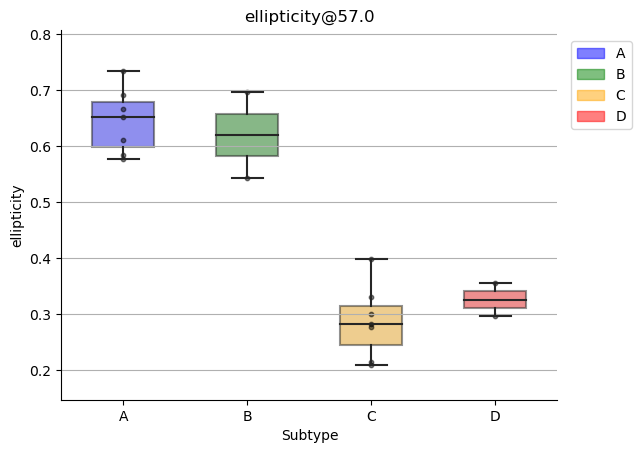

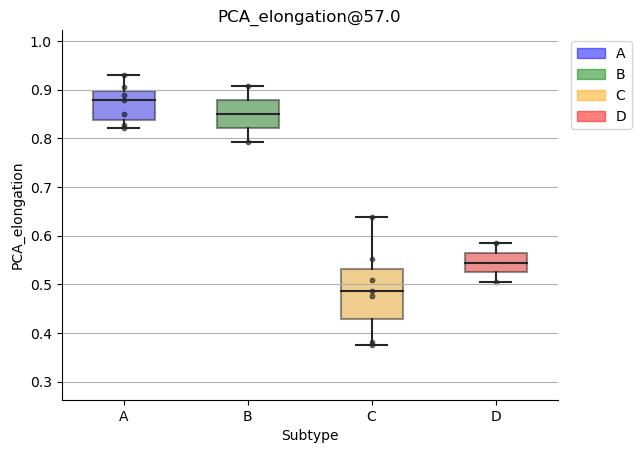

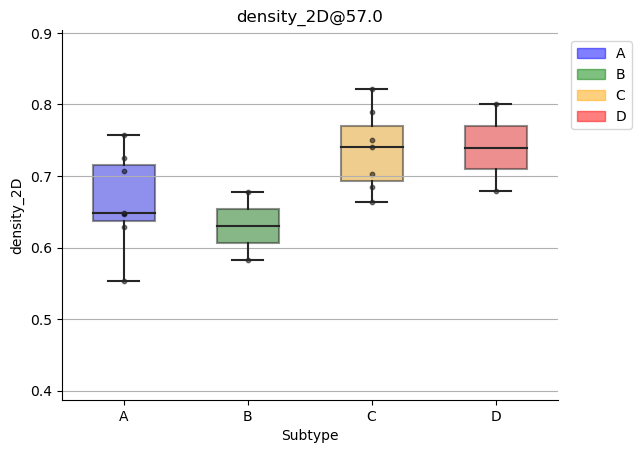

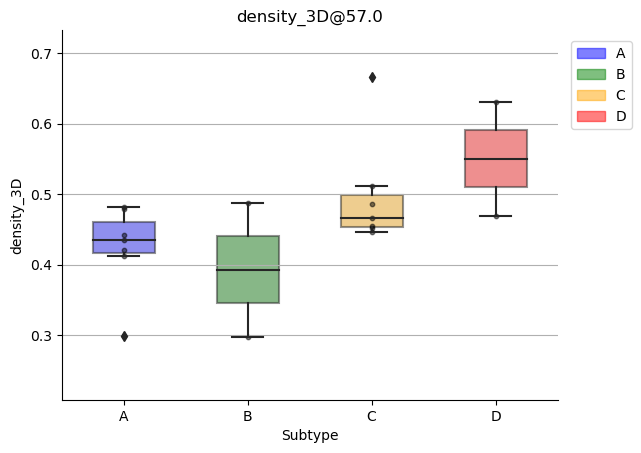

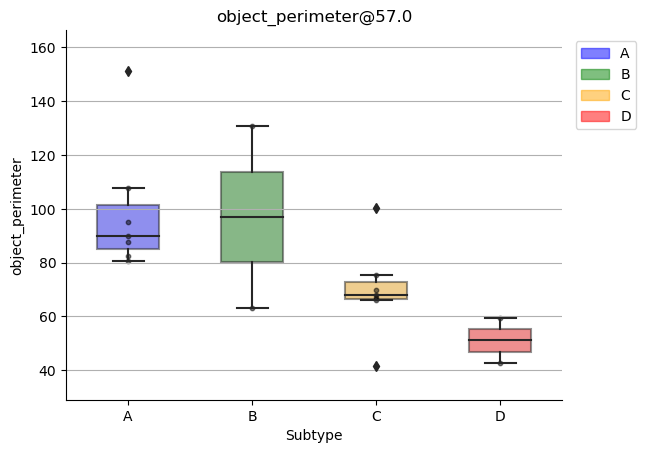

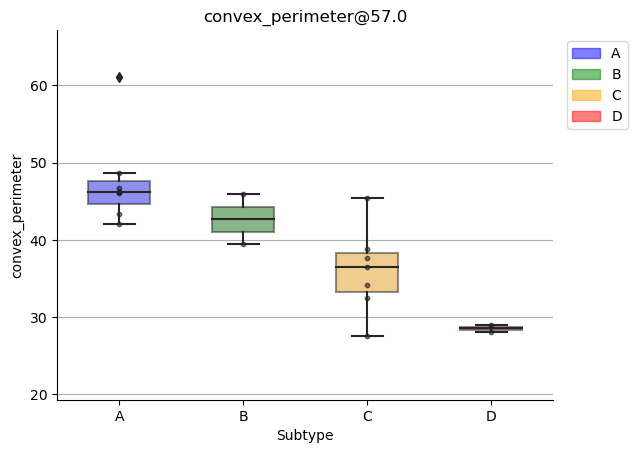

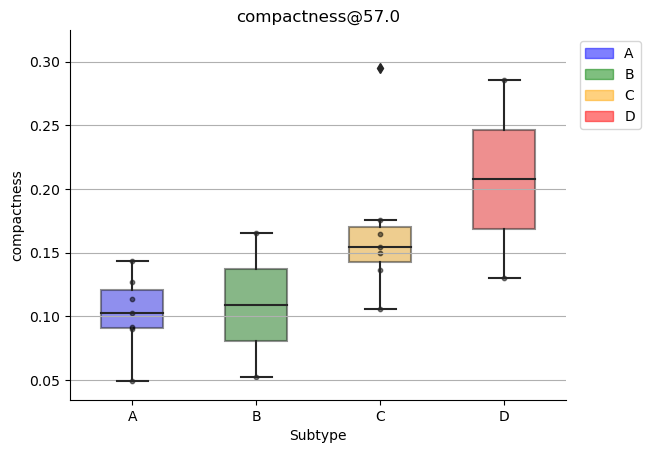

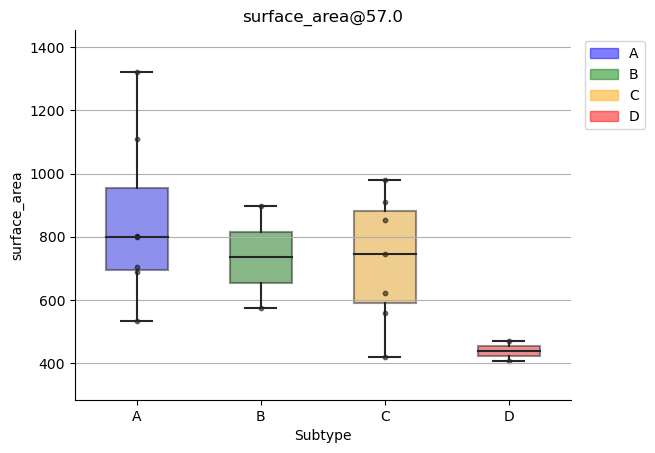

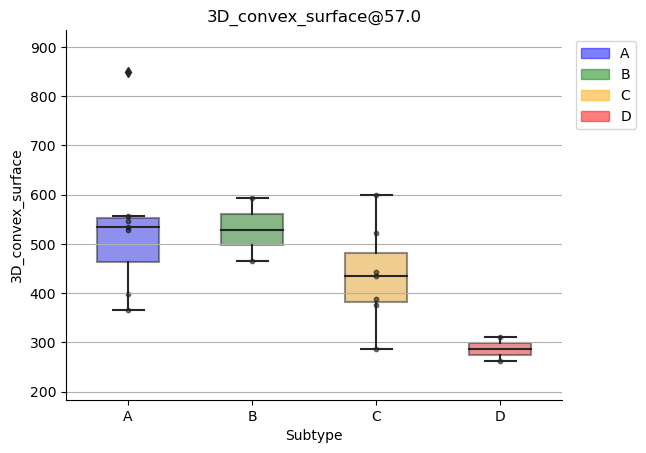

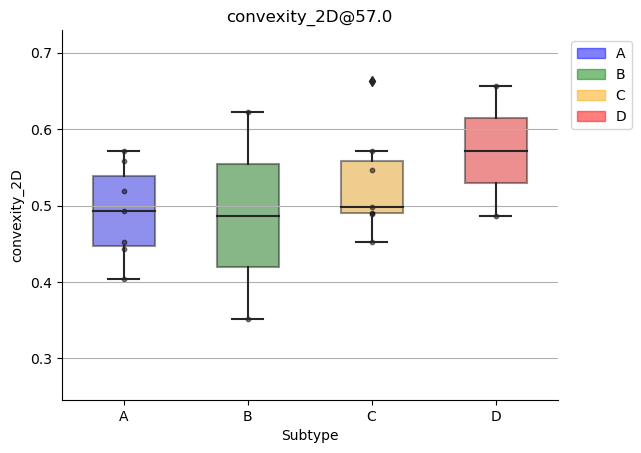

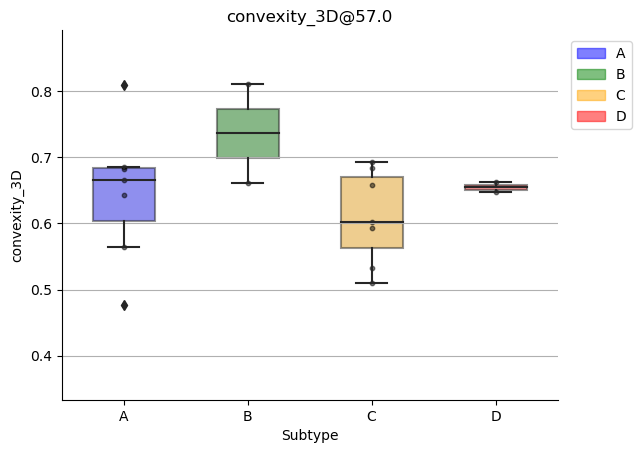

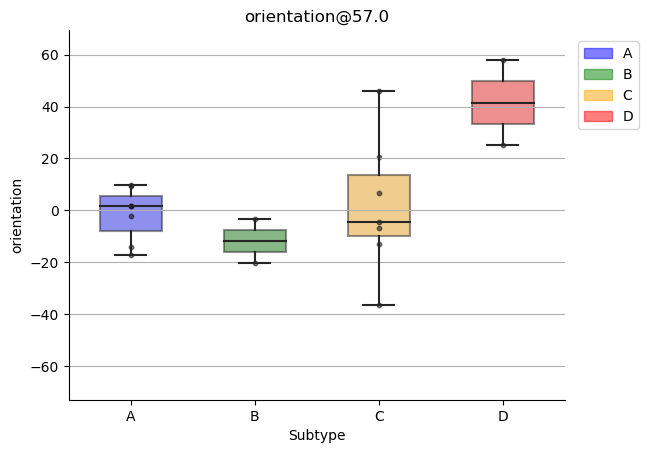

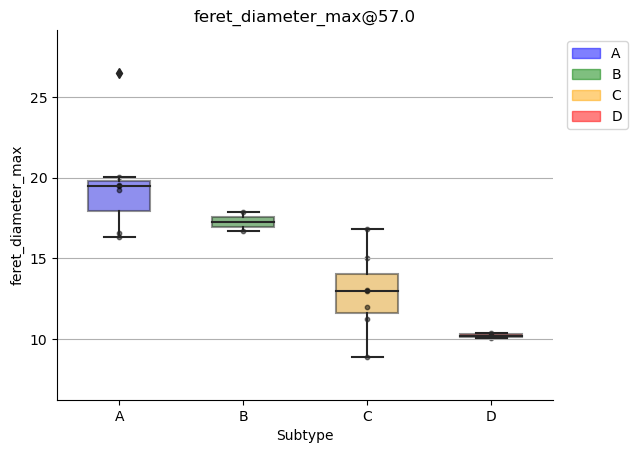

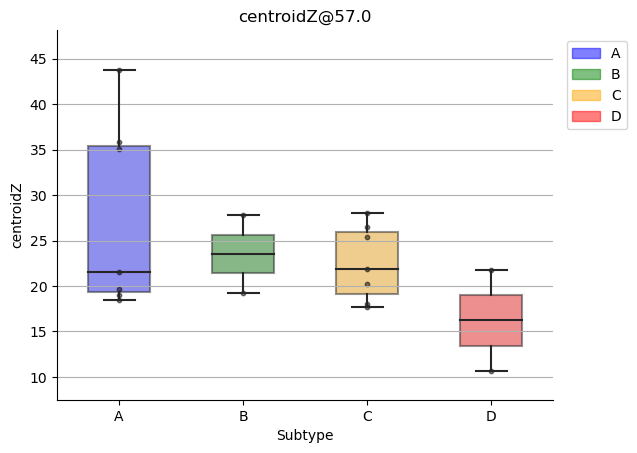

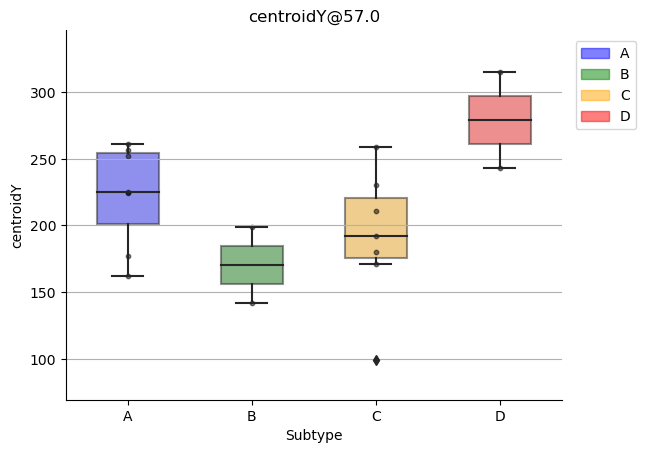

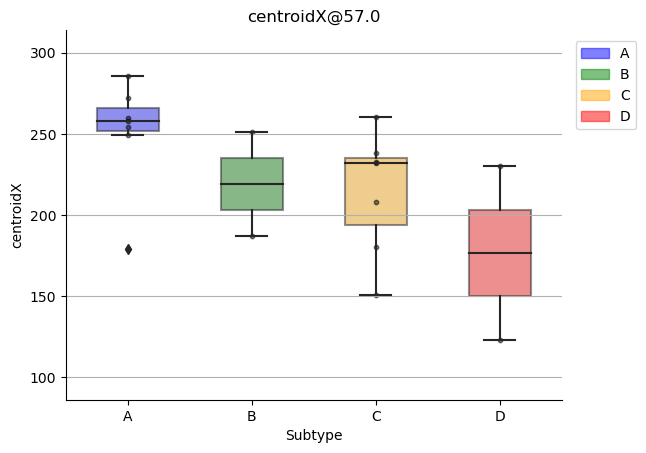

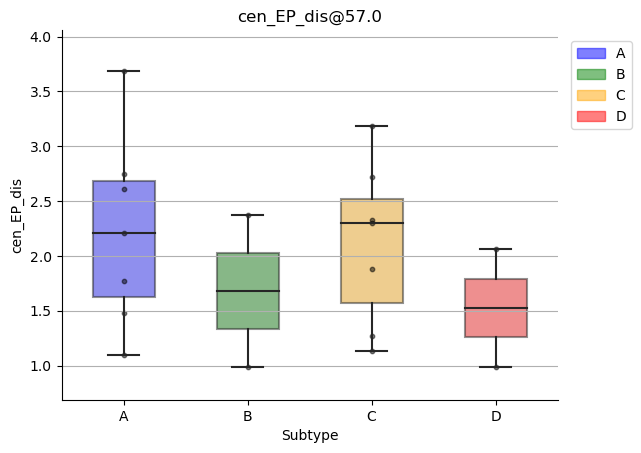

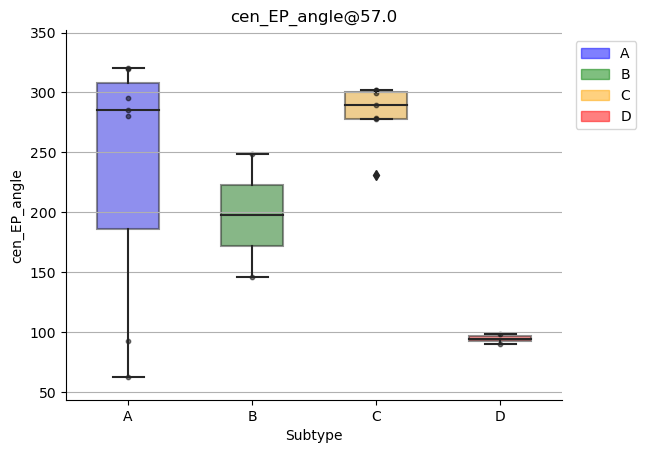

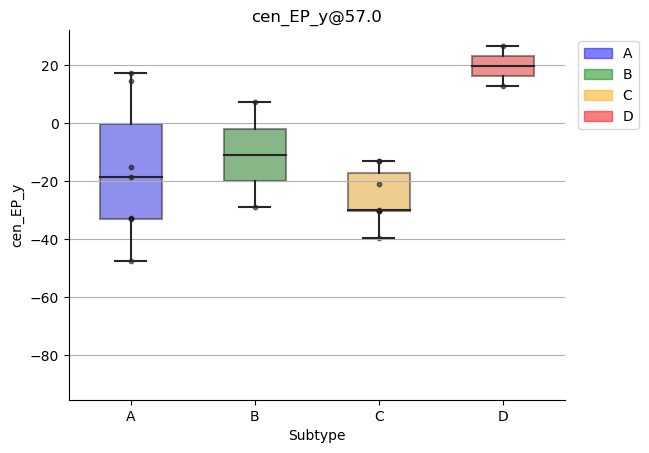

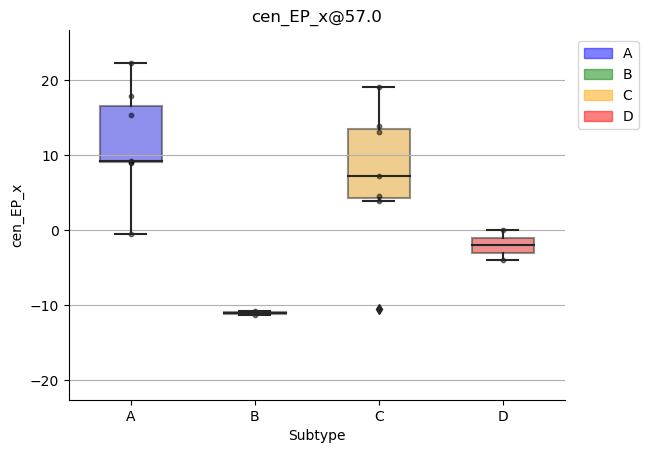

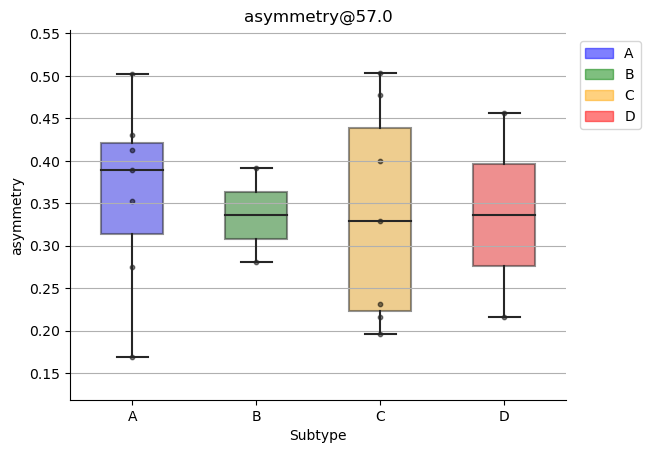

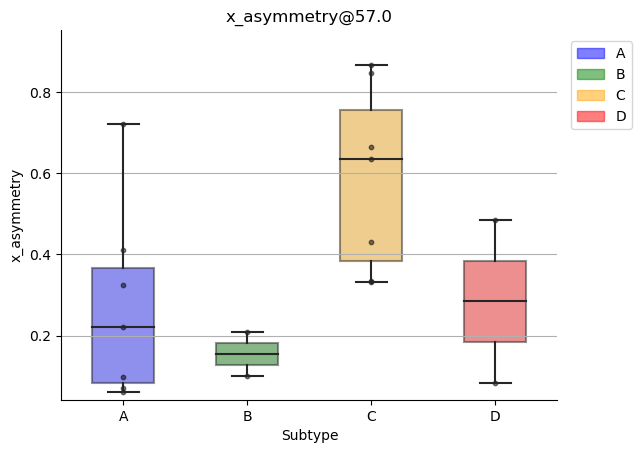

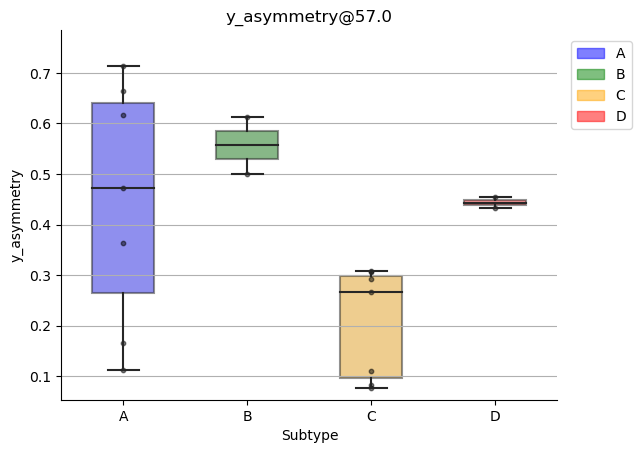

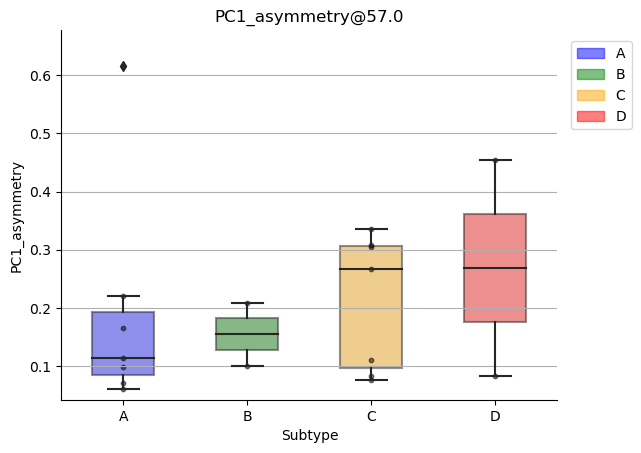

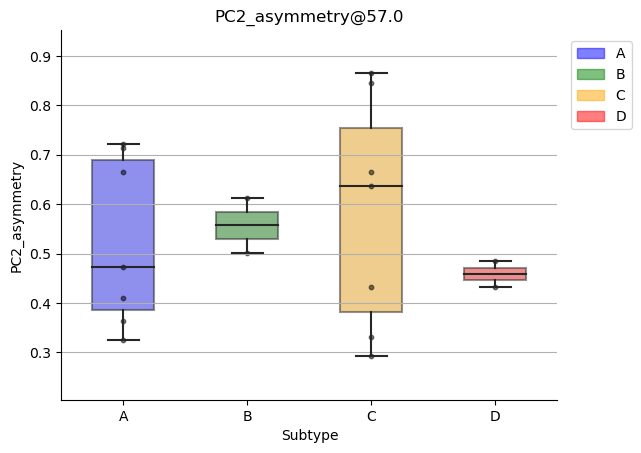

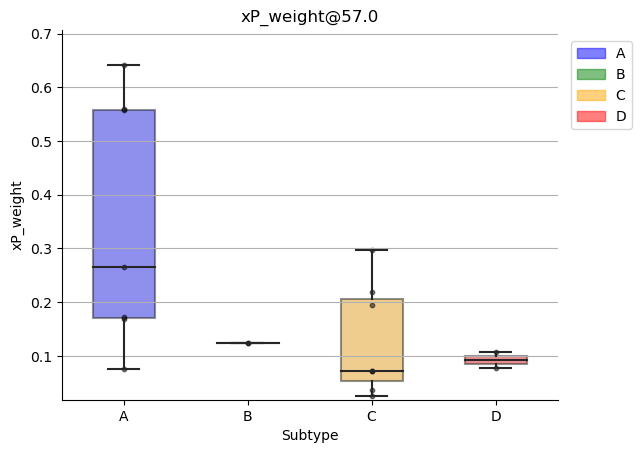

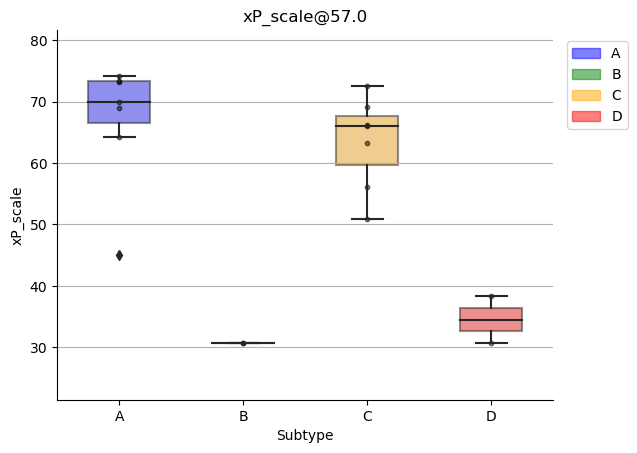

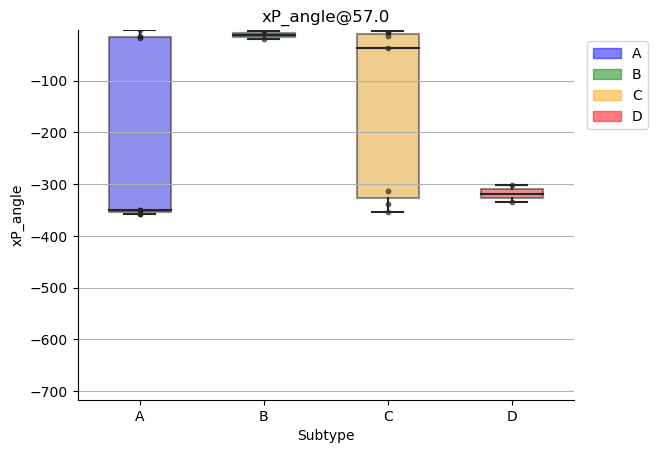

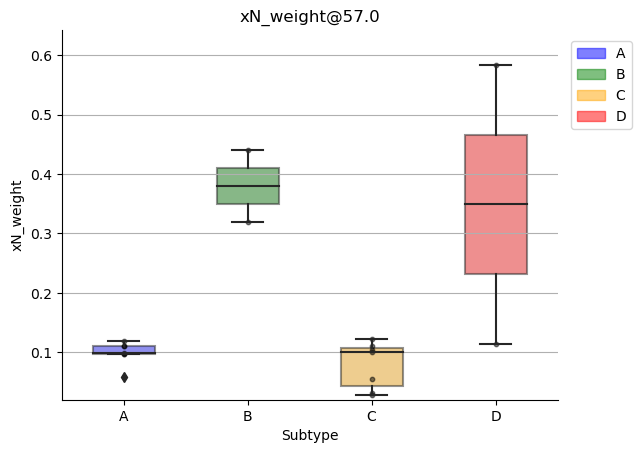

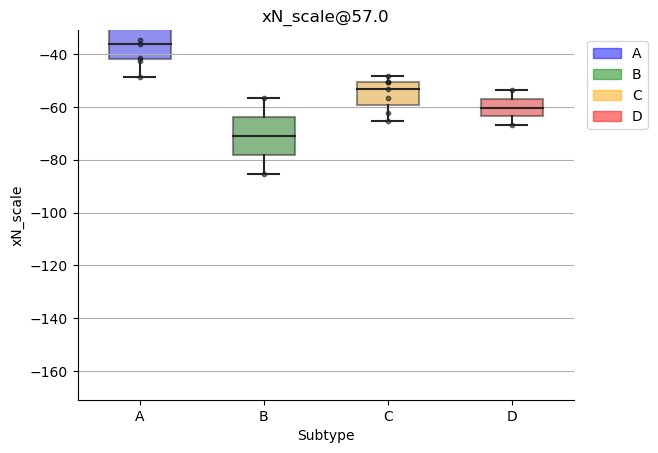

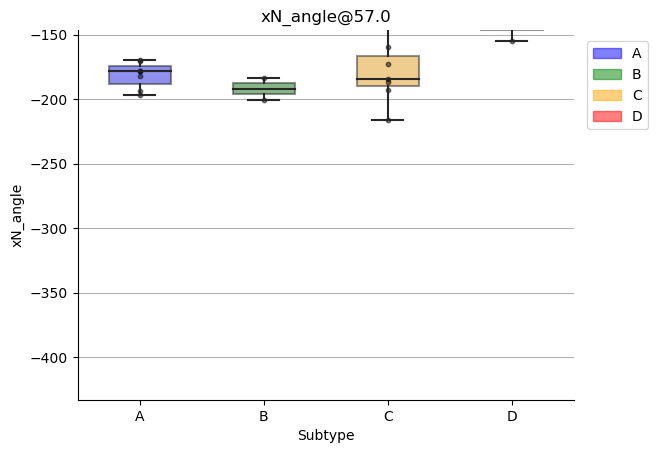

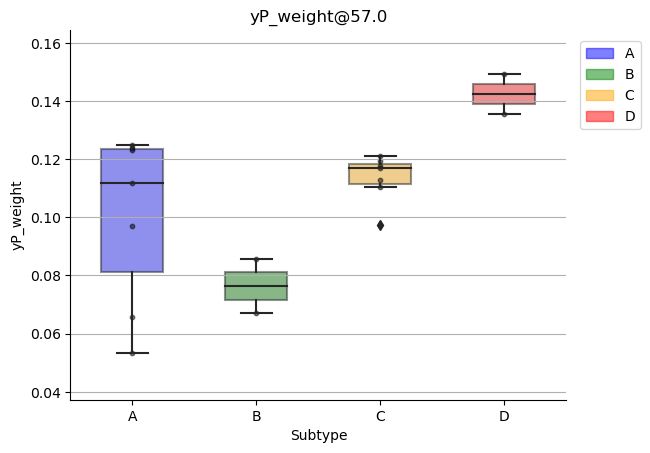

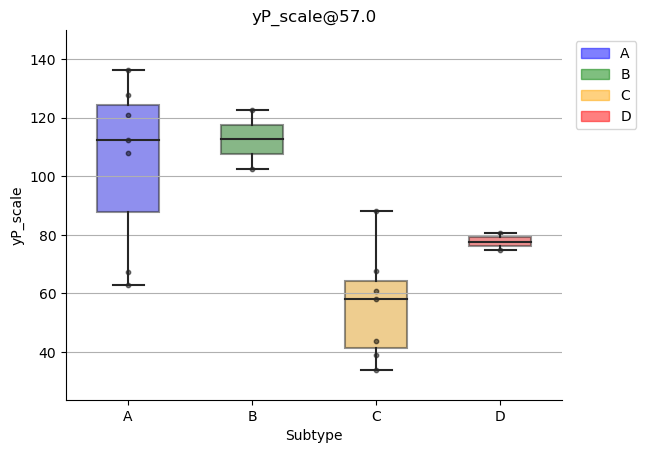

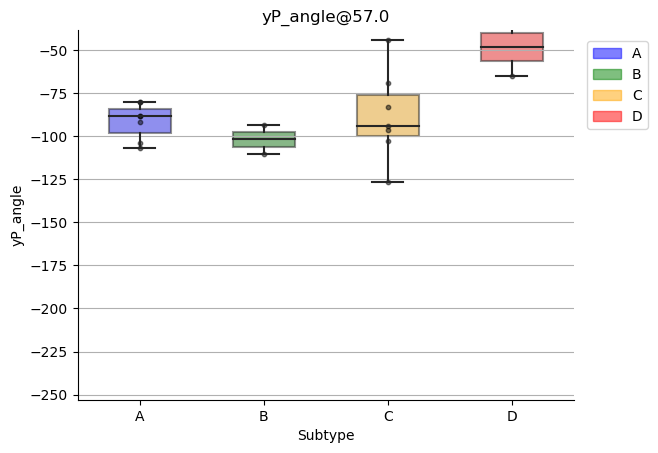

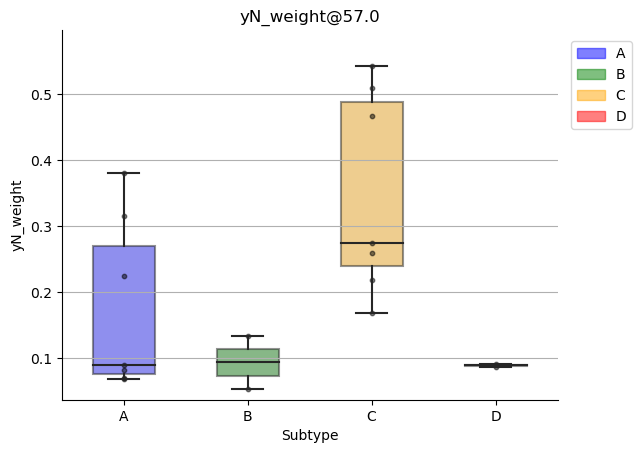

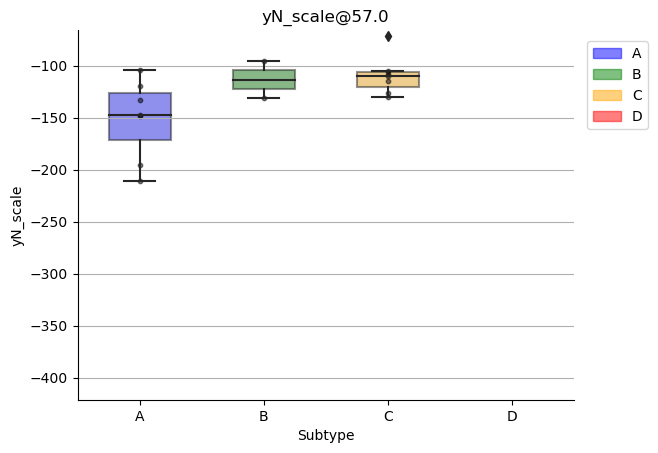

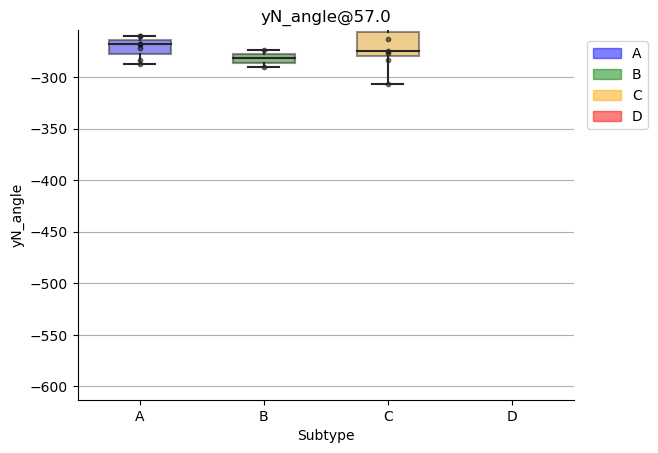

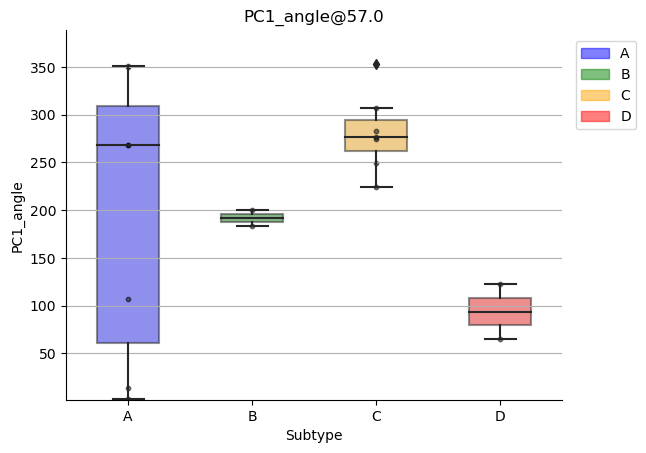

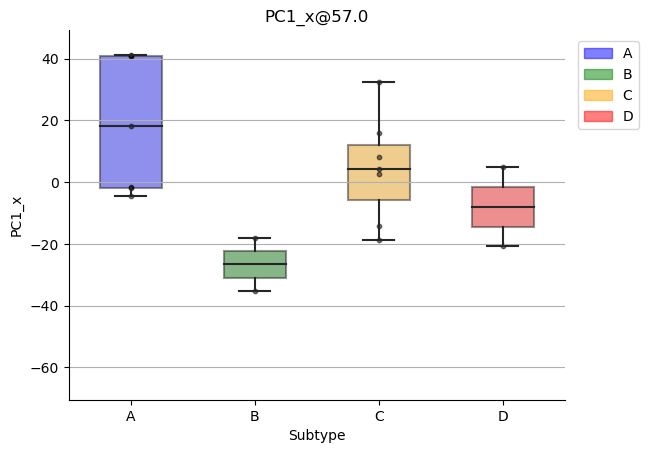

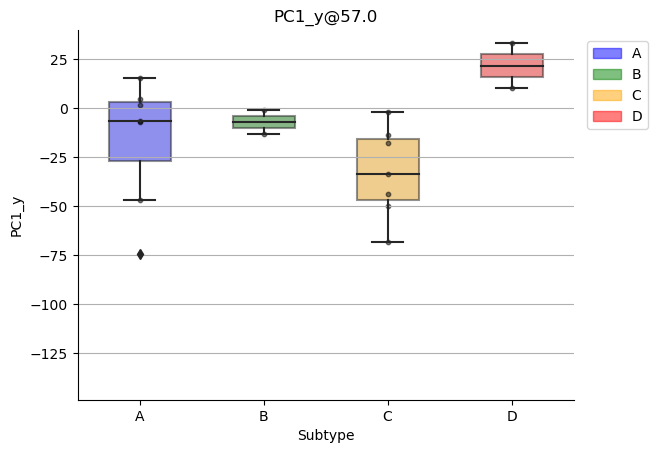

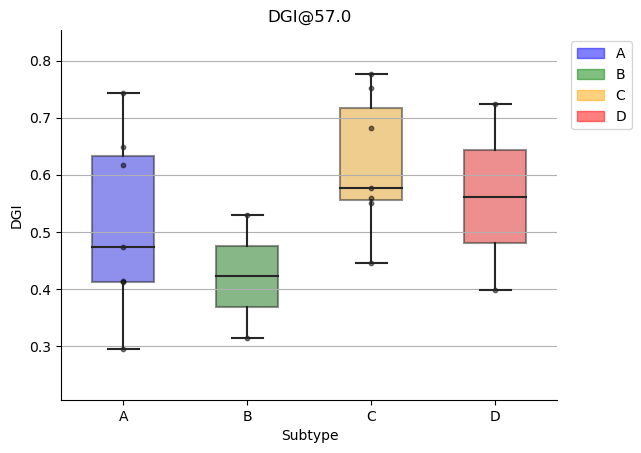

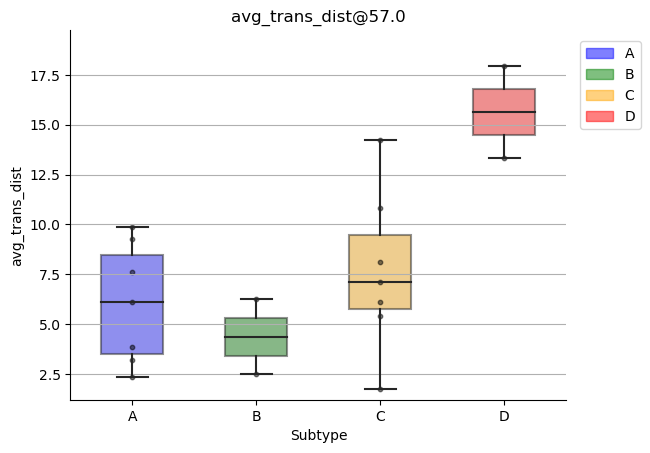

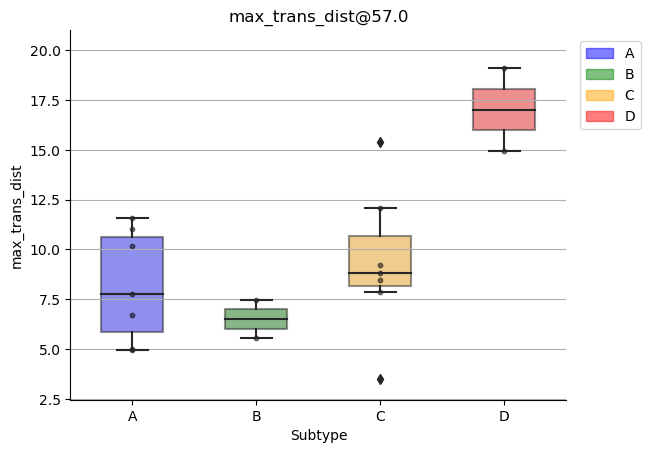

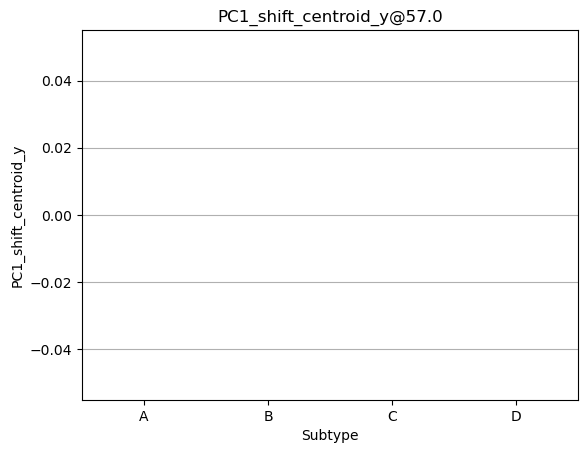

In [126]:
# plotting individual subtypes at specific timepoint
Plot_t = 80
plt_order = ['A', 'B', 'C', 'D']
for plot_col in plot_cols:
    # creating a dataframe with 1 column of timepoints
    timepoints = {'timepoint':np.arange(36,58,0.25)}
    collective_results = pd.DataFrame(timepoints)
    #reading the specified column from each output file, and adding it to collective_results
    for file in output_files:
        neu_name = os.path.basename(file[:file.find('_output.csv')])
        temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
        temp_df = temp_df.rename(columns={plot_col:neu_name})
        collective_results = pd.merge(collective_results, temp_df, on='timepoint')
    
    y_vals = collective_results.loc[Plot_t]
    del collective_results
    neu_names = list(y_vals.keys()[1:])
    neu_types = [neu.split('_s')[1][0] for neu in neu_names]
    val_col_name = plot_col+'@'+str(y_vals['timepoint'])
    plot_df = {'neu_name':neu_names, 'subtype':neu_types, 
                val_col_name:y_vals[1:]}
    plot_df = pd.DataFrame(plot_df)
    # plot_df.index = range(len(neu_names))
    fig, ax = plt.subplots(1)
    # sns.violinplot(x='subtype', y=plot_col, data=results_df, order=my_order, palette=Colors, hue="subtype")
    
    for i,neu in plot_df.iterrows():
        ax.scatter(x_p[neu.subtype],neu[val_col_name],c='k', marker='o', s=10)
    sns.boxplot(x=plot_df.subtype, y=plot_df[val_col_name], 
                order=plt_order, width=0.5,
                palette=Colors, boxprops=dict(alpha=.5))
    plt.setp(ax.collections, alpha=.5)
    ax.set_title(val_col_name)
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    if plot_df[val_col_name].min() > 0:
        ax.set_ylim(0.7*plot_df[val_col_name].min(),1.1*plot_df[val_col_name].max())
    else:
        ax.set_ylim(2*plot_df[val_col_name].min(),1.2*plot_df[val_col_name].max())
    # x = np.array([0,1,2,3])

    # ax.set_ylim(0.9*plot_df[val_col_name].min(),1.1*plot_df[val_col_name].max())
    sns.despine()
    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = val_col_name+'hAPF.pdf'
    # plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')


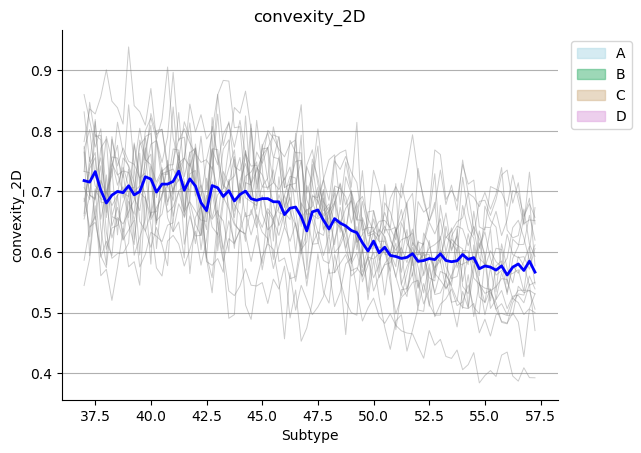

In [13]:
# time plots between horizontal and vertical
# Colors = {'A':'teal','B':'teal','C':'#881a58','D':'#881a58'}
Colors = {'A':'lightblue','B':'mediumseagreen','C':'tan','D':'plum'}
neu_types = {}
for neu in output_files:
    name = path.splitext(path.basename(neu))[0]
    neu_types[name] = name.split('_s')[1]
neu_types = {'neu_type':list(neu_types.values()),'neu_name':list(neu_types.keys())}
neu_types = pd.DataFrame(neu_types)

plt_order = ['A', 'B', 'C', 'D']
for plot_col in time_plots:
    # creating a dataframe with 1 column of timepoints
    timepoints = {'timepoint':np.arange(36,58,0.25)}
    results = pd.DataFrame(timepoints)
    #reading the specified column from each output file, and adding it to collective_results
    for file in output_files:
        neu_name = os.path.basename(file[:file.find('.csv')])
        temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
        temp_df = temp_df.rename(columns={plot_col:neu_name})
        results = pd.merge(results, temp_df, on='timepoint')
    
    # # # normalize all timepoints based on T0, use the following line 
    # results.loc[:, results.columns != 'timepoint'] = results.loc[:, 
    #                                                 results.columns != 'timepoint'].div(results.loc[0, 
    #                                                                                     results.columns != 'timepoint'])

    # # normalize each neuron to its max 
    # results.loc[:, results.columns != 'timepoint'] = results.loc[:, 
    #                                                 results.columns != 'timepoint'].div(results.loc[:, 
    #                                                                                     results.columns != 'timepoint'].max())

    # dividing the cells into two groups (hori_subset and Vert_subset)
    Hori_subset = neu_types[(neu_types.neu_type == 'A') | (neu_types.neu_type == 'B')]
    Hori_subset = results[Hori_subset.neu_name]
    Hori_subset['mean_'+plot_col] = Hori_subset.mean(axis = 1)
    Hori_subset['std_'+plot_col] = Hori_subset.std(axis = 1)

    Vert_subset = neu_types[(neu_types.neu_type == 'C') | (neu_types.neu_type == 'D')]
    Vert_subset = results[Vert_subset.neu_name]
    Vert_subset['mean_'+plot_col] = Vert_subset.mean(axis = 1)
    Vert_subset['std_'+plot_col] = Vert_subset.std(axis = 1)

    neu_names = list(results.loc[:, results.columns != 'timepoint'].columns)
    fig, ax = plt.subplots(1)
    
    for neu in neu_names:
        # name = path.splitext(path.basename(neu))[0]
        subtype = neu.split('_s')[1]
        plt.plot(results.timepoint,results[neu],c=Colors[subtype], alpha=0.7, linewidth=0.7)
    plt.plot(results.timepoint, Hori_subset['mean_'+plot_col], c='teal', alpha=1, linewidth=2)
    plt.plot(results.timepoint, Vert_subset['mean_'+plot_col], c='#881a58', alpha=1, linewidth=2)
    ax.set_title(plot_col)
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    # ax.set_ylim(0.9*plot_df[val_col_name].min(),1.1*plot_df[val_col_name].max())
    sns.despine()
    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = plot_col+'_normalized_overtime.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

In [8]:
neu

'mean_convexity_2D'

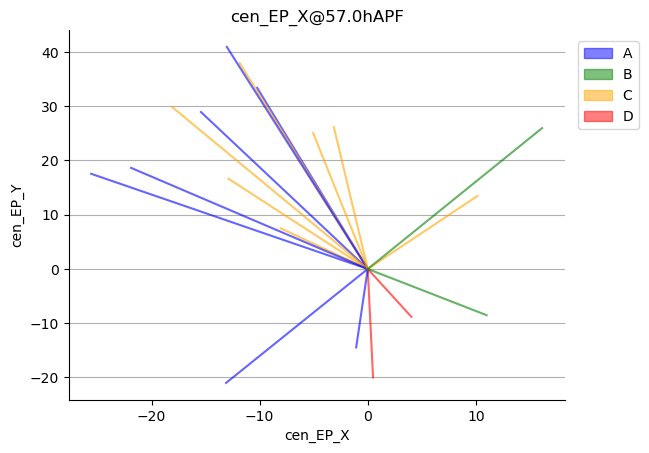

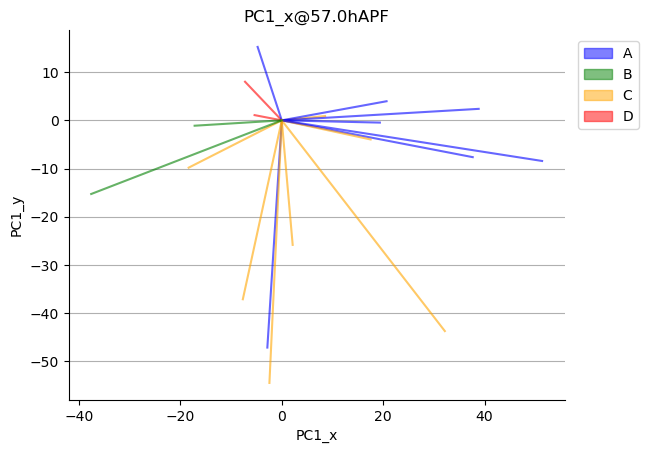

In [91]:
Plot_t = 80
# Colors = {'A':'lightblue','B':'mediumseagreen','C':'tan','D':'plum'}
Colors = {'A':'b','B':'g','C':'orange','D':'r'}
for plot_cols in plot_2D_cols:
    neu_types = {}
    for neu in output_files:
        name = path.splitext(path.basename(neu))[0]
        neu_types[name] = name.split('_s')[1]
    neu_types = {'neu_type':list(neu_types.values()),'neu_name':list(neu_types.keys())}
    neu_types = pd.DataFrame(neu_types)
    results = pd.DataFrame(columns=plot_cols)


    #reading the specified column from each output file, and adding it to collective_results
    for i, file in enumerate(output_files):
        neu_name = os.path.basename(file[:file.find('.csv')])
        temp_df = pd.read_csv(file, sep=',', usecols = plot_cols)
        temp_df = {neu_name:temp_df.iloc[Plot_t]}
        temp_df = pd.DataFrame(temp_df).T
        results = pd.concat([results, temp_df]) 
    results['center'] = [0 for i in range(len(results))]

    #ploting
    fig, ax = plt.subplots(1)
    for i, row_val in results.iterrows():
        subtype = i[-1]
        plt.plot((row_val.center,row_val[plot_cols[0]]),
                    (row_val.center,row_val[plot_cols[1]]), 
                    c=Colors[subtype], alpha=0.6)
    ax.set_title(plot_cols[0]+'@'+str(y_vals['timepoint'])+'hAPF')
    ax.yaxis.grid(True)
    ax.set_xlabel(plot_cols[0])
    ax.set_ylabel(plot_cols[1])
    # ax.set_ylim(0.9*plot_df[val_col_name].min(),1.1*plot_df[val_col_name].max())
    sns.despine()
    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = plot_cols[0]+'@'+str(y_vals['timepoint'])+'hAPF.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

/tmp/ipykernel_4124/75293236.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hori_subset['mean_'] = Hori_subset.mean(axis = 1)
/tmp/ipykernel_4124/75293236.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hori_subset['std_'] = Hori_subset.std(axis = 1)
/tmp/ipykernel_4124/75293236.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

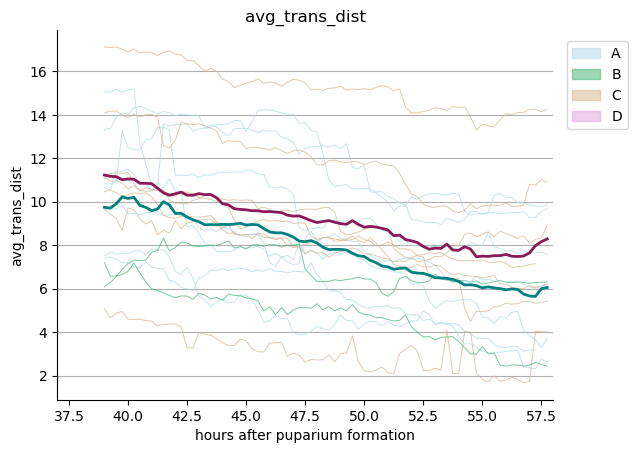

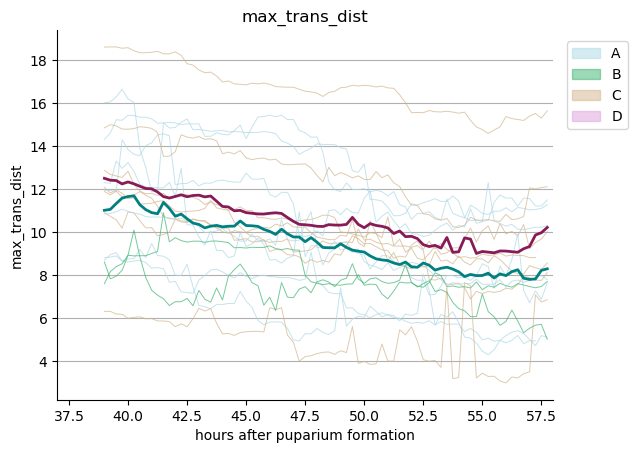

In [103]:
# time plots between horizontal and vertical
# Colors = {'A':'teal','B':'teal','C':'#881a58','D':'#881a58'}
Colors = {'A':'lightblue','B':'mediumseagreen','C':'tan','D':'plum'}
neu_types = {}
for neu in output_files:
    name = path.splitext(path.basename(neu))[0]
    neu_types[name] = name.split('_s')[1]
neu_types = {'neu_type':list(neu_types.values()),'neu_name':list(neu_types.keys())}
neu_types = pd.DataFrame(neu_types)

plt_order = ['A', 'B', 'C', 'D']
norm_T_plots = [('3D_convex_surface', '3D_convex_volume'), ('surface_area','volume')]
for plot_col in time_plots:
    # creating a dataframe with 1 column of timepoints
    timepoints = {'timepoint':np.arange(37,58,0.25)}
    results = pd.DataFrame(timepoints)
    #reading the specified column from each output file, and adding it to collective_results
    for file in output_files:
        neu_name = os.path.basename(file[:file.find('.csv')])
        temp_df = pd.read_csv(file, sep=',', usecols = [plot_col])
        # temp_df = temp_df.rename(columns={plot_col:neu_name})
        results[neu_name] = temp_df
        # results[neu_name] = temp_df[plot_col[0]]/temp_df[plot_col[1]]

    #     # # # normalize all timepoints based on T0, use the following line 
    # results.loc[:, results.columns != 'timepoint'] = results.loc[:, 
    #                                                 results.columns != 'timepoint'].div(results.loc[0, 
    #                                                                                     results.columns != 'timepoint'])

    # # # normalize each neuron to its max 
    # results.loc[:, results.columns != 'timepoint'] = results.loc[:, 
    #                                                 results.columns != 'timepoint'].div(results.loc[:, 
    #                                                                                     results.columns != 'timepoint'].max())

    # dividing the cells into two groups (hori_subset and Vert_subset)
    Hori_subset = neu_types[(neu_types.neu_type == 'A') | (neu_types.neu_type == 'B')]
    Hori_subset = results[Hori_subset.neu_name]
    Hori_subset['mean_'] = Hori_subset.mean(axis = 1)
    Hori_subset['std_'] = Hori_subset.std(axis = 1)

    Vert_subset = neu_types[(neu_types.neu_type == 'C') | (neu_types.neu_type == 'D')]
    Vert_subset = results[Vert_subset.neu_name]
    Vert_subset['mean_'] = Vert_subset.mean(axis = 1)
    Vert_subset['std_'] = Vert_subset.std(axis = 1)

    neu_names = list(results.loc[:, results.columns != 'timepoint'].columns)
    fig, ax = plt.subplots(1)
    
    for neu in neu_names:
        # name = path.splitext(path.basename(neu))[0]
        subtype = neu.split('_s')[1]
        plt.plot(results.timepoint,results[neu],c=Colors[subtype], alpha=0.7, linewidth=0.7)
    plt.plot(results.timepoint, Hori_subset['mean_'], c='teal', alpha=1, linewidth=2)
    plt.plot(results.timepoint, Vert_subset['mean_'], c='#881a58', alpha=1, linewidth=2)
    # ax.set_title('ratio_of_'+plot_col[0]+'_to_'+plot_col[1])
    ax.set_title(plot_col)
    ax.yaxis.grid(True)
    ax.set_xlabel('hours after puparium formation')
    ax.set_xlim(37,58)
    # ax.set_ylabel(plot_col[0]+'/'+plot_col[1])
    ax.set_ylabel(plot_col)
    # ax.set_ylim(0.9*plot_df[val_col_name].min(),1.1*plot_df[val_col_name].max())
    sns.despine()
    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    # plot_name = 'ratio_of_'+plot_col[0]+'_to_'+plot_col[1]+'_overtime.pdf'
    # plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

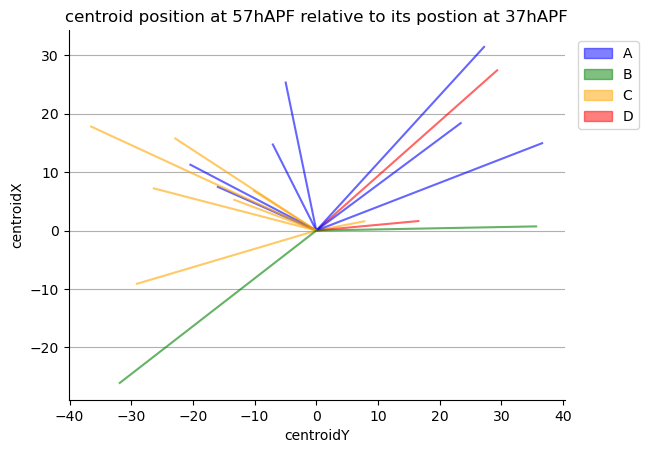

In [152]:
Colors = {'A':'b','B':'g','C':'orange','D':'r'}
plot_cols = ['centroidY', 'centroidX']
neu_types = {}
for neu in output_files:
    name = path.splitext(path.basename(neu))[0]
    neu_types[name] = name.split('_s')[1]
neu_types = {'neu_type':list(neu_types.values()),'neu_name':list(neu_types.keys())}
neu_types = pd.DataFrame(neu_types)

results = pd.DataFrame(columns=plot_cols)
# creating a dataframe with 1 column of timepoints
# timepoints = {'timepoint':np.arange(36,58,0.25)}
# results = pd.DataFrame(timepoints)

#reading the specified column from each output file, and adding it to collective_results
for i, file in enumerate(output_files):
    neu_name = os.path.basename(file[:file.find('.csv')])
    temp_df = pd.read_csv(file, sep=',', usecols = plot_cols)
    temp_df = {neu_name:temp_df.iloc[-1]-temp_df.iloc[0]}
    temp_df = pd.DataFrame(temp_df).T
    results = pd.concat([results, temp_df]) 
results['center'] = [0 for i in range(len(results))]

#ploting
fig, ax = plt.subplots(1)
for i, row_val in results.iterrows():
    subtype = i[-1]
    plt.plot((row_val.center,row_val[plot_cols[0]]),
                (row_val.center,row_val[plot_cols[1]]), 
                c=Colors[subtype], alpha=0.6)
ax.set_title('centroid position at 57hAPF relative to its postion at 37hAPF')
ax.yaxis.grid(True)
ax.set_xlabel(plot_cols[0])
ax.set_ylabel(plot_cols[1])
# ax.set_ylim(0.9*plot_df[val_col_name].min(),1.1*plot_df[val_col_name].max())
sns.despine()
legend_patches = []
for subtype,color in Colors.items():
    legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
            loc=1, borderaxespad=0., prop={'size': 10})
plot_name = 'centroid_@'+str(y_vals['timepoint'])+'hAPF_relative_to_37hAPF.pdf'
plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')


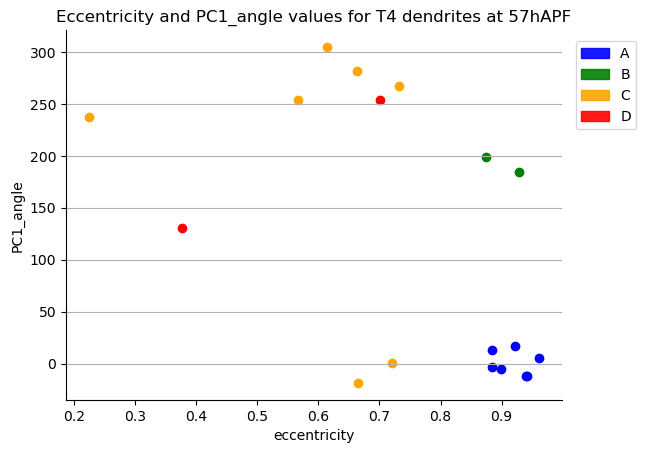

In [191]:
Colors = {'A':'b','B':'g','C':'orange','D':'r'}
plot_cols = ['eccentricity', 'PC1_angle']
neu_types = {}
for neu in output_files:
    name = path.splitext(path.basename(neu))[0]
    neu_types[name] = name.split('_s')[1]
neu_types = {'neu_type':list(neu_types.values()),'neu_name':list(neu_types.keys())}
neu_types = pd.DataFrame(neu_types)

results = pd.DataFrame(columns=plot_cols)

#reading the specified column from each output file, and adding it to collective_results
for i, file in enumerate(output_files):
    neu_name = os.path.basename(file[:file.find('.csv')])
    temp_df = pd.read_csv(file, sep=',', usecols = plot_cols)
    temp_df = temp_df.iloc[-1]
    results.loc[neu_name] = temp_df

    
fig, ax = plt.subplots(1)
for i, neu in neu_types.iterrows():
    neu_name = neu.neu_name
    subtype = neu.neu_type
    c=Colors[subtype]
    data = results.loc[neu_name]
    plt.scatter(data.iloc[0], data.iloc[1], c=c)

ax.set_title('Eccentricity and PC1_angle values for T4 dendrites at 57hAPF')
ax.yaxis.grid(True)
ax.set_xlabel(plot_cols[0])
ax.set_ylabel(plot_cols[1])
# # ax.set_ylim(0.9*plot_df[val_col_name].min(),1.1*plot_df[val_col_name].max())
sns.despine()
legend_patches = []
for subtype,color in Colors.items():
    legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.9))
plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
            loc=1, borderaxespad=0., prop={'size': 10})
plot_name = 'eccentricity_and_PC1Angle_@_57hAPF.pdf'
plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

In [160]:
del results['eccentricity']
del results['orientation']

In [176]:
results

,eccentricity,orientation
220209_P36_N2_sA,0.883859,3.173127
220209_P36_N1_sC,0.566718,16.542217
220127_P36_N1_sD,0.377267,49.087458
211121_P36.5_N3_sC,0.720144,-0.296709
211121_P36.5_N2_sA,0.884286,-13.228781
211121_P36.5_N1_sA,0.922429,-16.747940
211114_P36_N3_sC,0.732204,2.587961
211114_P36_N2_sA,0.961908,-5.214066
211114_P36_N1_sA,0.899540,5.299870
211113_P36_N2_sA,0.939659,11.611055


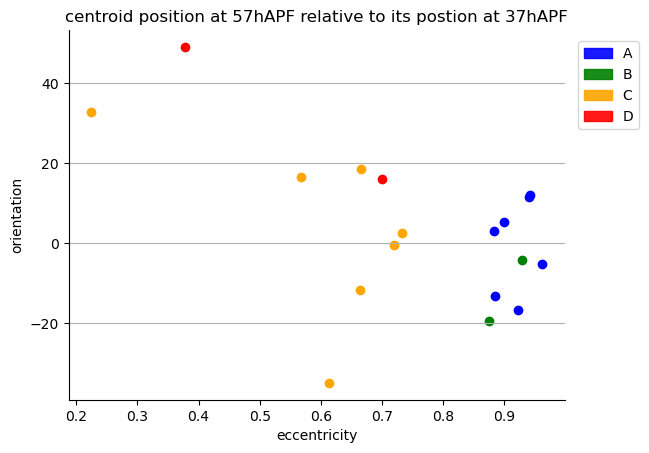

In [177]:
fig, ax = plt.subplots(1)
for i, neu in neu_types.iterrows():
    neu_name = neu.neu_name
    subtype = neu.neu_type
    c=Colors[subtype]
    data = results.loc[neu_name]
    plt.scatter(data.iloc[0], data.iloc[1], c=c)

ax.set_title('centroid position at 57hAPF relative to its postion at 37hAPF')
ax.yaxis.grid(True)
ax.set_xlabel(plot_cols[0])
ax.set_ylabel(plot_cols[1])
# # ax.set_ylim(0.9*plot_df[val_col_name].min(),1.1*plot_df[val_col_name].max())
sns.despine()
legend_patches = []
for subtype,color in Colors.items():
    legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.9))
plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
            loc=1, borderaxespad=0., prop={'size': 10})
# plot_name = 'centroid_@'+str(y_vals['timepoint'])+'hAPF_relative_to_37hAPF.pdf'
# plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

In [164]:
neu_types

,neu_type,neu_name
0,A,220209_P36_N2_sA
1,C,220209_P36_N1_sC
2,D,220127_P36_N1_sD
3,C,211121_P36.5_N3_sC
4,A,211121_P36.5_N2_sA
5,A,211121_P36.5_N1_sA
6,C,211114_P36_N3_sC
7,A,211114_P36_N2_sA
8,A,211114_P36_N1_sA
9,A,211113_P36_N2_sA


In [41]:
temp_df.iloc[0]

timepoint     37.000000
centroidY    170.725667
centroidX    206.443814
Name: 0, dtype: float64

In [13]:
for plot_col in plot_2D_cols:
    # creating a dataframe with 1 column of timepoints
    timepoints = {'timepoint':np.arange(36,58,0.25)}
    collective_results_X = pd.DataFrame(timepoints)
    collective_results_Y = pd.DataFrame(timepoints)
    #reading the specified column from each output file, and adding it to collective_results
    for file in output_files:
        neu_name = os.path.basename(file[:file.find('_output.csv')])
        temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col[0]])
        temp_df = temp_df.rename(columns={plot_col[0]:neu_name})
        collective_results_X = pd.merge(collective_results_X, temp_df, on='timepoint')
        temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col[1]])
        temp_df = temp_df.rename(columns={plot_col[1]:neu_name})
        collective_results_Y = pd.merge(collective_results_Y, temp_df, on='timepoint')
    x_vals = collective_results_X.loc[Plot_t]
    y_vals = collective_results_Y.loc[Plot_t]
    

In [94]:
Plot_t = 80
plt_order = ['A', 'B', 'C', 'D']
for plot_col in plot_2D_cols:
    # creating a dataframe with 1 column of timepoints
    timepoints = {'timepoint':np.arange(36,58,0.25)}
    collective_results = pd.DataFrame(timepoints)
    #reading the specified column from each output file, and adding it to collective_results
    for file in output_files:
        neu_name = os.path.basename(file[:file.find('_output.csv')])
        temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col[1]])
        temp_df = temp_df.rename(columns={plot_col[1]:neu_name})
        collective_results = pd.merge(collective_results, temp_df, on='timepoint')
    
    y_vals = collective_results.loc[Plot_t]

In [ ]:
Plot_t = 80
plt_order = ['A', 'B', 'C', 'D']
timepoints = {'timepoint':np.arange(36,58,0.25)}
collective_results = pd.DataFrame(timepoints)
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('_output.csv')])
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
    temp_df = temp_df.rename(columns={plot_col:neu_name})
    collective_results = pd.merge(collective_results, temp_df, on='timepoint')

In [ ]:
# for violin plot of Y_value grouped by subtype on the x_axis
# plot_col = 'convexity_3D'
for plot_col in viloin_plots_to_do:
    fig, ax = plt.subplots(1)
    my_order = ['A', 'B', 'C', 'D']
    # sns.violinplot(x='subtype', y=plot_col, data=results_df, order=my_order, palette=Colors, hue="subtype")
    sns.boxplot(x=results_df.subtype, y=results_df[plot_col], 
                order=my_order, width=0.5,
                palette=Colors, boxprops=dict(alpha=.5))
    plt.setp(ax.collections, alpha=.5)

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    ax.set_ylim(0.9*results_df[plot_col].min(),1.1*results_df[plot_col].max())
    x = np.array([0,1,2,3])
    my_xticks = ['A','B','C','D']
    plt.xticks(x, my_xticks)
    sns.despine()
    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = plot_col+'_in_adult_T4_dendrites.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False)

In [5]:
results_df = pd.read_csv(data_path, index_col=0)

In [6]:
results_df.head()

,neuron,subtype,entry_point,volume,net_area,area,AP_spread,DV_spread,density_2D,density_3D,...,yP_scale,yP_angle,yP_xy,yN_weight,yN_scale,yN_angle,yN_xy,PCA_angle,PCA_xy,PCA_shift_centroid
0,T4-02,A,[ 11 347 337],108849,14980,27964,146,267,0.535689,0.363586,...,146.971715,-99.687679,"(-0.0964996688972741, 0.5652782239136788)",0.003842,-112.013844,-279.687679,"(0.07241650660220049, -0.4242032610257114)",-9.687679,"(39.34590188342817, 6.716810136304233)","(4.393954512209415, 21.89753021929927)"
1,T4-03,D,[ 22 651 367],108692,17030,38753,159,336,0.439450,0.219961,...,91.193838,-86.747302,"(0.5951072459657829, 10.471458819771144)",0.526327,-246.534458,-266.747302,"(-7.3624309385526585, -129.54873749074792)",-266.747302,"(-7.3624309385526585, -129.54873749074792)","(-83.91317987304318, -6.3473051991717675)"
2,T4-04,B,[ 18 569 625],186473,21180,43348,167,352,0.488604,0.289973,...,146.007427,-91.955341,"(-0.28542086865273697, 8.360211519175595)",0.074719,-205.685251,-271.955341,"(0.5243854677985635, -15.35968077271772)",-181.955341,"(-104.21433415715065, -3.557917848486889)","(-16.921708624837933, -47.9081530700065)"
3,T4-05,D,[ 10 666 452],170394,22127,51284,207,367,0.431460,0.215020,...,95.363716,-81.309100,"(1.613308582059392, 10.554229281046819)",0.549541,-282.230528,-261.309100,"(-23.435768901607982, -153.31628500324416)",-261.309100,"(-23.435768901607982, -153.31628500324416)","(-97.30143836713606, -15.992372805863232)"
4,T4-06,D,[ 15 441 368],168232,20893,43249,155,367,0.483086,0.240248,...,106.038768,-80.571119,"(2.1034614700853624, 12.66635343034258)",0.467388,-259.251018,-260.571119,"(-19.850616474093734, -119.53388623792972)",-260.571119,"(-19.850616474093734, -119.53388623792972)","(-82.37215767197284, 0.870859272895592)"


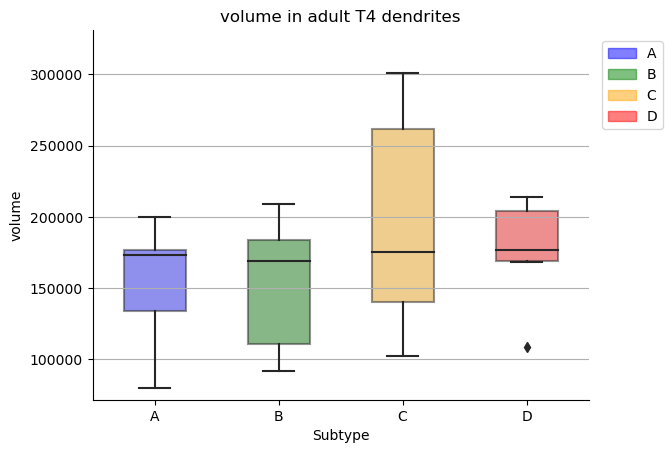

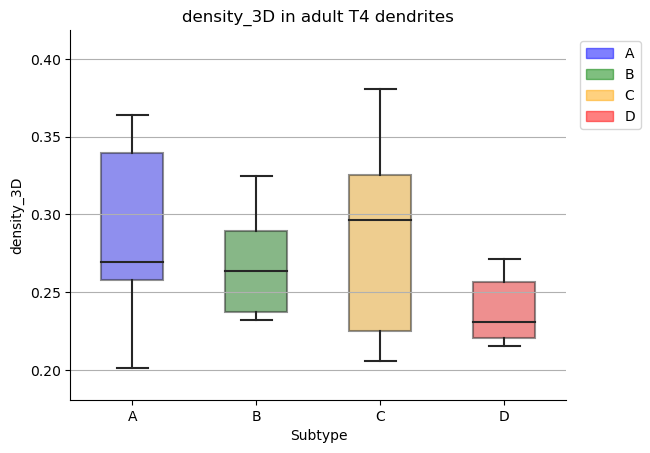

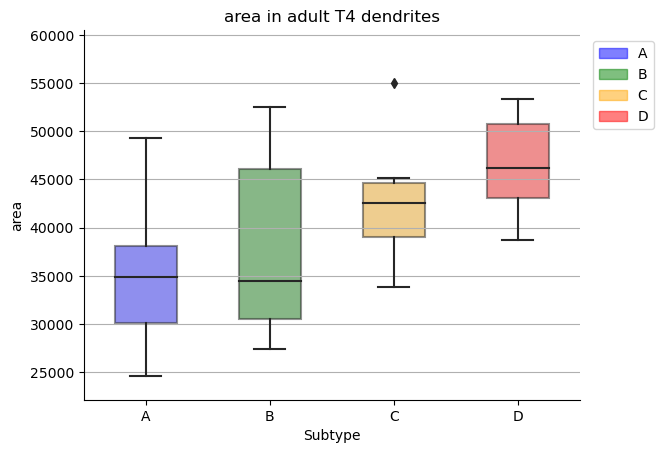

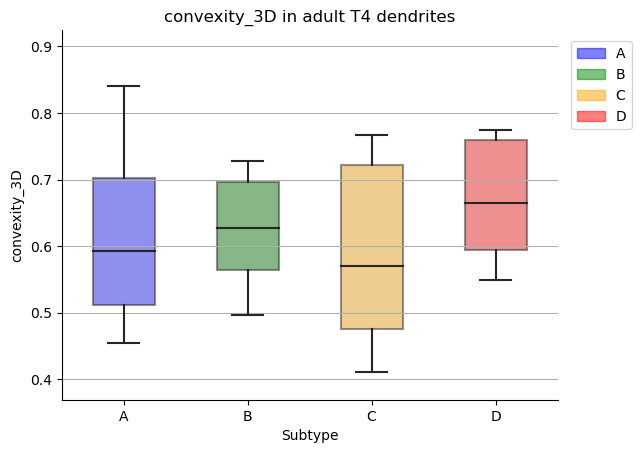

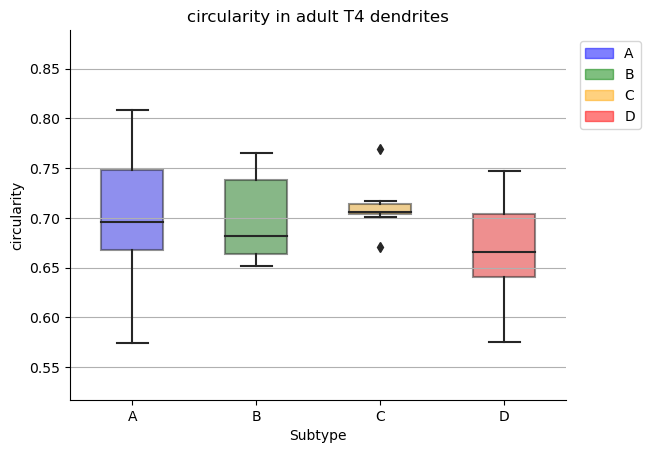

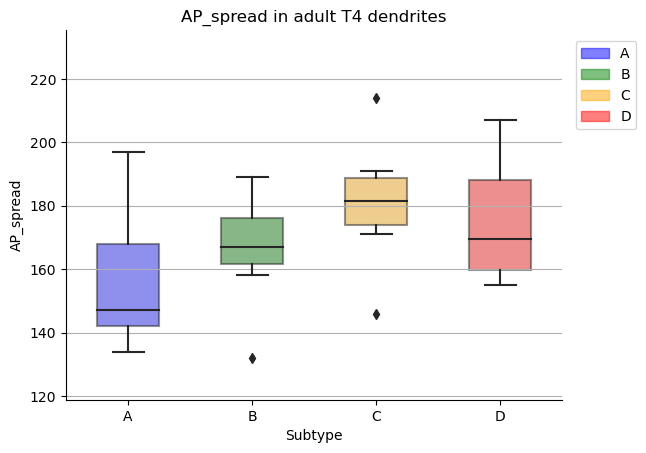

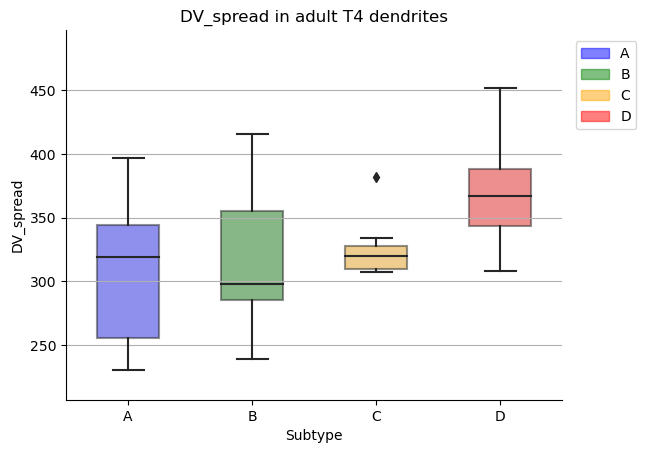

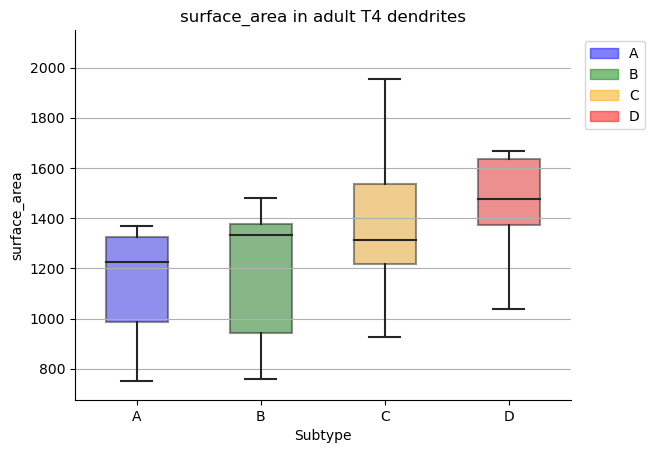

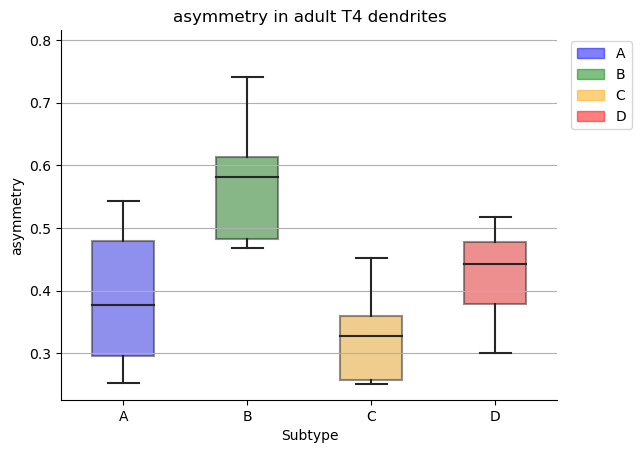

In [7]:
# for violin plot of Y_value grouped by subtype on the x_axis
# plot_col = 'convexity_3D'
for plot_col in viloin_plots_to_do:
    fig, ax = plt.subplots(1)
    my_order = ['A', 'B', 'C', 'D']
    # sns.violinplot(x='subtype', y=plot_col, data=results_df, order=my_order, palette=Colors, hue="subtype")
    sns.boxplot(x=results_df.subtype, y=results_df[plot_col], 
                order=my_order, width=0.5,
                palette=Colors, boxprops=dict(alpha=.5))
    plt.setp(ax.collections, alpha=.5)

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    ax.set_ylim(0.9*results_df[plot_col].min(),1.1*results_df[plot_col].max())
    x = np.array([0,1,2,3])
    my_xticks = ['A','B','C','D']
    plt.xticks(x, my_xticks)
    sns.despine()
    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = plot_col+'_in_adult_T4_dendrites.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False)

NameError: name 'x_p' is not defined

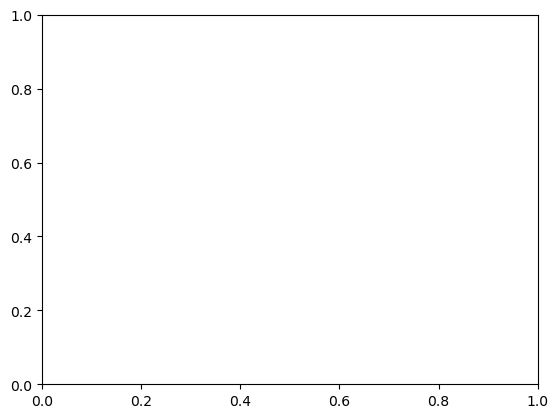

In [8]:
# for violin plot of Y_value grouped by subtype on the x_axis
# plot_col = 'convexity_3D'
for plot_col in viloin_plots_to_do:
    fig, ax = plt.subplots(1)
    # y_vals = results_df.convexity_3D
    for neu,color in Colors.items():
        subset = results_df[plot_col][results_df.subtype==neu]
        violin_parts =  ax.violinplot(subset, positions=[x_p[neu]], vert=True, widths=0.5, 
                                    showmeans=False, showextrema=True, showmedians=False, 
                                    quantiles=[0.5], bw_method=None)
        # for pc in violin_parts['bodies']:
        #     pc.set_facecolor(color)
        #     pc.set_edgecolor(color)

    ax.set_ylim(0.9*results_df[plot_col].min(),1.1*results_df[plot_col].max())

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    x = np.array([0,1,2,3])
    my_xticks = ['A','B','C','D']
    plt.xticks(x, my_xticks)
    sns.despine()

    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = plot_col+'_in_adult_T4_dendrites.pdf'
    # plt.savefig(save_path+plot_name, facecolor='white', transparent=False)

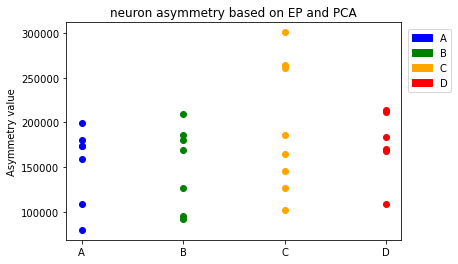

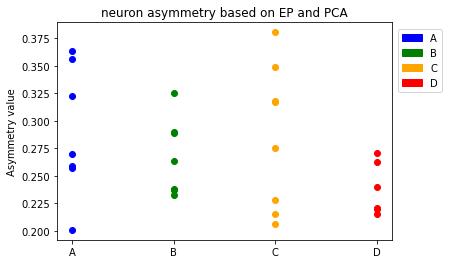

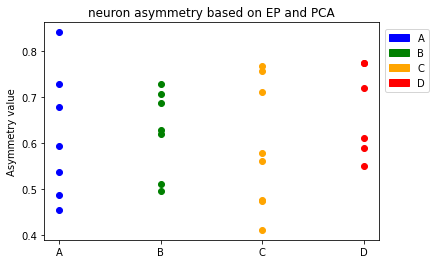

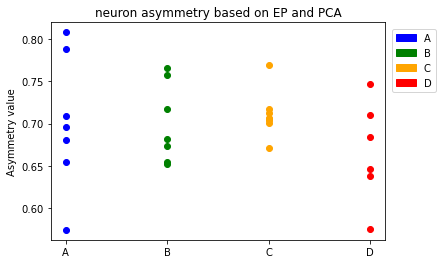

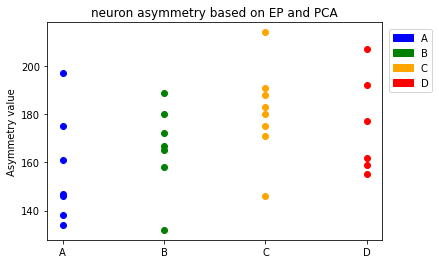

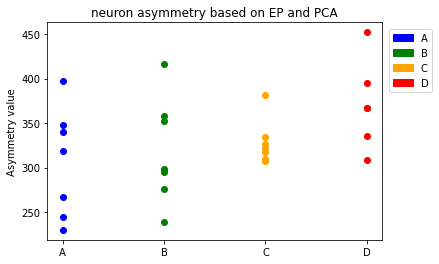

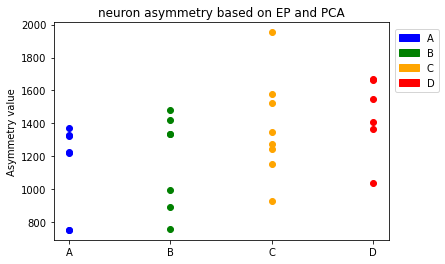

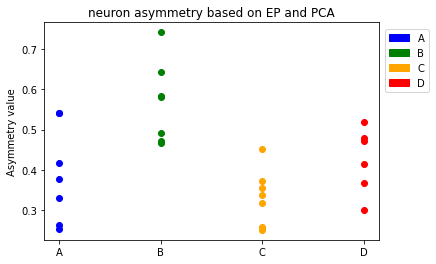

In [ ]:
# for violin plot of Y_value grouped by subtype on the x_axis
for plot_col in viloin_plots_to_do:
    fig, ax = plt.subplots(1)
    colors = {'A':'b','B':'g','C':'orange','D':'r'}
    x_p = {'A':1,'B':2,'C':3,'D':4}
    y_vals = results_df[plot_col]
    for i,neu in enumerate(y_vals):
        ax.scatter(x_p[results_df.subtype[i]],neu,c=colors[results_df.subtype[i]])
    
    ax.set_ylim(0.9*results_df[plot_col].min(),1.1*results_df[plot_col].max())

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    x = np.array([0,1,2,3])
    my_xticks = ['A','B','C','D']
    plt.xticks(x, my_xticks)
    sns.despine()

    legend_patches = []
    for subtype,color in colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    # plt.savefig(save_path+'adult_T4_Asymmetry.png', facecolor='white', transparent=False)

/tmp/ipykernel_759423/2965648711.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  col_vals = col_vals.str.replace(i,'')
/tmp/ipykernel_759423/2965648711.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  col_vals = col_vals.str.replace(i,'')


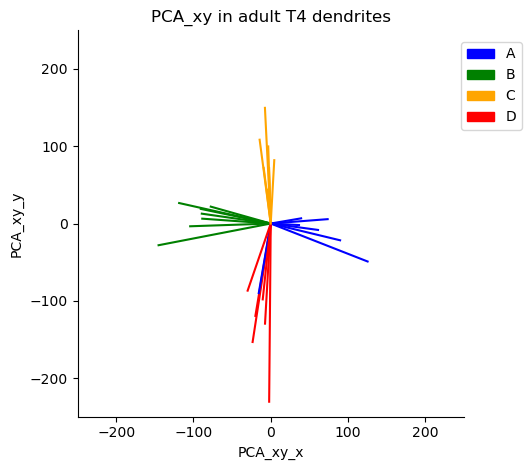

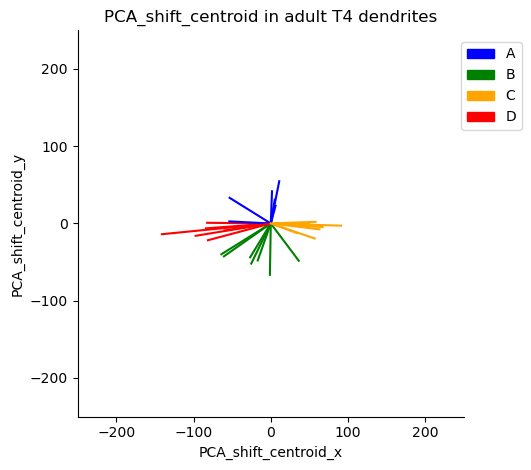

In [9]:
# To plot x,y value of one metric for individual neurons, colored by subtype
for plot_col in line_plots_to_do:
    fig, ax = plt.subplots(1)
    col_vals = results_df[plot_col]
    for i in ['(',')','[',']']:
        col_vals = col_vals.str.replace(i,'')
    col_vals = col_vals.str.split(',')
    for i, val in col_vals.items():
        col_vals[i] = [float(n) for n in val]
    for i,neu in enumerate(col_vals):
        ax.plot((0,neu[0]),(0,neu[1]),c=Colors[results_df.subtype[i]])
    
    # ax.set_ylim(1.2*y_vals.str[1].min(),1.2*y_vals.str[1].max())
    # ax.set_xlim(1.2*y_vals.str[0].min(),1.2*y_vals.str[0].max())

    ax.set_ylim(-250,250)
    ax.set_xlim(-250,250)

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.set_xlabel(plot_col+'_x')
    ax.set_ylabel(plot_col+'_y')
    sns.despine()

    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})

    ax.set_aspect('equal', 'box')
    fig.tight_layout()
    plot_name = plot_col+'_in_adult_T4_dendrites.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False)